#### **ANÁLISIS DE LA DISTANCIA MÍNIMA DE INTERSECCIÓN ORBITAL ASTEROIDAL**

#### **EDA**

Definición de variables:



- **_id_**: Identificador único del objeto.
- **_spkid_**: SPK-ID, un identificador único utilizado por el JPL de la NASA (Jet Propulsion Laboratory).
- **_full\_name_**: Nombre completo o designación del objeto.
- **_pdes_**: Designación principal del objeto.
- **_name_**: Nombre común del objeto (si tiene).
- **_prefix_**: Prefijo del objeto (si tiene).
- **_neo_**: Indicador de si el objeto es un objeto cercano a la Tierra (NEO).
- **_pha_**: Indicador de si el objeto es un asteroide potencialmente peligroso (PHA).
- **_H_**: Magnitud absoluta (brillo) del objeto.
- **_diameter_**: Diámetro estimado del objeto (en kilómetros).
- **_albedo_**: Albedo (reflectividad) del objeto.
- **_diameter\_sigma_**: Incertidumbre en la estimación del diámetro.
- **_orbit\_id_**: Identificador de los datos orbitales utilizados.
- **_epoch_**: Época de los elementos orbitales (en Fecha Juliana).
- **_epoch\_mjd_**: Época de los elementos orbitales (en Fecha Juliana Modificada).
- **_epoch\_cal_**: Época de los elementos orbitales (en fecha de calendario).
- **_equinox_**: Equinoccio de los elementos orbitales.
- **_e_**: Excentricidad orbital.
- **_a_**: Semieje mayor (distancia promedio del sol, en unidades astronómicas).
- **_q_**: Distancia al perihelio (máxima aproximación al sol, en unidades astronómicas).
- **_i_**: Inclinación orbital (inclinación de la órbita en relación con la eclíptica, en grados).
- **_om_**: Longitud del nodo ascendente (en grados).
- **_w_**: Argumento del perihelio (en grados).
- **_ma_**: Anomalía media (en grados).
- **_ad_**: Distancia al afelio (distancia máxima del sol, en unidades astronómicas).
- **_n_**: Movimiento medio (tasa promedio de movimiento a lo largo de la órbita, en grados por día).
- **_tp_**: Tiempo del paso por el perihelio (en Fecha Juliana).
- **_tp\_cal_**: Tiempo del paso por el perihelio (en fecha de calendario).
- **_per_**: Período orbital (tiempo para completar una órbita, en días).
- **_per\_y_**: Período orbital (tiempo para completar una órbita, en años).
- **_moid_**: Distancia mínima de intersección de la órbita (distancia más cercana a la órbita de la Tierra, en unidades astronómicas).
- **_moid\_ld_**: Distancia mínima de intersección de la órbita (en distancias lunares).
- **_sigma\_e_**: Incertidumbre en la excentricidad orbital.
- **_sigma\_a_**: Incertidumbre en el semieje mayor.
- **_sigma\_q_**: Incertidumbre en la distancia al perihelio.
- **_sigma\_i_**: Incertidumbre en la inclinación orbital.
- **_sigma\_om_**: Incertidumbre en la longitud del nodo ascendente.
- **_sigma\_w_**: Incertidumbre en el argumento del perihelio.
- **_sigma\_ma_**: Incertidumbre en la anomalía media.
- **_sigma\_ad_**: Incertidumbre en la distancia al afelio.
- **_sigma\_n_**: Incertidumbre en el movimiento medio.
- **_sigma\_tp_**: Incertidumbre en el tiempo del paso por el perihelio.
- **_sigma\_per_**: Incertidumbre en el período orbital.
- **_class_**: Clasificación dinámica del objeto (por ejemplo, "AMO" para asteroides Amor, "APO" para asteroides Apolo, etc.).
- **_rms_**: Raíz cuadrática media de los residuos (medida del ajuste de la órbita).


1. **Carga y concatenación de datos**

In [91]:
import pandas as pd

part1 = pd.read_csv('../Data/dataset_part1.csv')
part2 = pd.read_csv('../Data/dataset_part2.csv')
part3 = pd.read_csv('../Data/dataset_part3.csv')
part4 = pd.read_csv('../Data/dataset_part4.csv')
part5 = pd.read_csv('../Data/dataset_part5.csv')

total_data = pd.concat([part1, part2, part3, part4, part5], ignore_index=True)
total_data.head(1)

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.4,939.4,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301


Creación de una nueva tabla para almacenar los datos, se insertarán los datos del DataFrame en la tabla SQL.

In [92]:
import sqlite3

conn = sqlite3.connect("asteroids_database.db")
total_data.to_sql("asteroids_table", conn, if_exists = "replace", index = False)

958524

Como la cantidad de datos es muy grande (mas de 900000 datos) cogemos una muestra aleatoria de 150000.

In [93]:
query = '''
    SELECT *
    FROM asteroids_table
    ORDER BY RANDOM()
    LIMIT 120000
'''

sample_total_data = pd.read_sql_query(query, conn)

print("DataFrame leído de la base de datos SQL:")

print(sample_total_data.head())

conn.close()

DataFrame leído de la base de datos SQL:
         id    spkid            full_name       pdes  name prefix neo   pha  \
0  a0080608  2080608   80608 (2000 AB160)      80608  None   None   N     N   
1  a0343074  2343074   343074 (2009 CD58)     343074  None   None   N     N   
2  bK13Y64A  3665222          (2013 YA64)  2013 YA64  None   None   N     N   
3  a0241884  2241884   241884 (2001 VB34)     241884  None   None   N     N   
4  bK15X18B  3903943          (2015 XB18)  2015 XB18  None   None   N  None   

      H  diameter  ...   sigma_i  sigma_om   sigma_w  sigma_ma      sigma_ad  \
0  15.5     2.274  ...  0.000004  0.000034  0.000035  0.000010  8.096000e-09   
1  16.1       NaN  ...  0.000009  0.000036  0.000060  0.000047  4.745600e-08   
2  16.4       NaN  ...  0.000010  0.000058  0.000064  0.000023  4.240600e-08   
3  15.7     2.975  ...  0.000006  0.000058  0.000067  0.000034  3.242200e-08   
4  18.9       NaN  ...       NaN       NaN       NaN       NaN           NaN   

   

Guardado de la muestra

In [94]:
sample_total_data.to_csv('sampled_dataset.csv', index=False)

Tamaño del dataset

In [95]:
sample_total_data.shape

(120000, 45)

Información del dataset. 

Nos sirve para ver que variables son categóricas (object) y cuales numéricas (int64, float64)

In [128]:
sample_total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              150000 non-null  object 
 1   spkid           150000 non-null  int64  
 2   full_name       150000 non-null  object 
 3   pdes            150000 non-null  object 
 4   name            3453 non-null    object 
 5   prefix          2 non-null       object 
 6   neo             149999 non-null  object 
 7   pha             146894 non-null  object 
 8   H               149011 non-null  float64
 9   diameter        21175 non-null   float64
 10  albedo          21013 non-null   float64
 11  diameter_sigma  21154 non-null   float64
 12  orbit_id        150000 non-null  object 
 13  epoch           150000 non-null  float64
 14  epoch_mjd       150000 non-null  int64  
 15  epoch_cal       150000 non-null  float64
 16  equinox         150000 non-null  object 
 17  e         

2. **Exploración y limpieza de datos**

Eliminación de duplicados 

In [129]:
if sample_total_data.duplicated().sum():
    sample_total_data = sample_total_data.drop_duplicates()
print(sample_total_data.shape)
sample_total_data.head(1)

(150000, 45)


,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0233639,2233639,233639 (2007 WO17),233639,None,None,N,N,15.0,6.542,...,0.000007,0.000026,0.000133,0.000134,4.085500e-08,3.543700e-09,0.000737,0.000038,MBA,0.5725


**Conclusiones:**
- No se han encontrado duplicados

Contabilización de columnas numéricas y categóricas:
- Identificar columnas numéricas.
- Identificar columnas categóricas.


In [130]:

numeric_columns = sample_total_data.select_dtypes(include=['float64','int64']).columns.tolist()


categorical_columns = sample_total_data.select_dtypes(include=['object', 'category']).columns.tolist()

print(f'Número de columnas numéricas: {len(numeric_columns)}')
print('Columnas numéricas:', numeric_columns)

print(f'Número de columnas categóricas: {len(categorical_columns)}')
print('Columnas categóricas:', categorical_columns)

Número de columnas numéricas: 35
Columnas numéricas: ['spkid', 'H', 'diameter', 'albedo', 'diameter_sigma', 'epoch', 'epoch_mjd', 'epoch_cal', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y', 'moid', 'moid_ld', 'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w', 'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'rms']
Número de columnas categóricas: 10
Columnas categóricas: ['id', 'full_name', 'pdes', 'name', 'prefix', 'neo', 'pha', 'orbit_id', 'equinox', 'class']


Eliminamos las columnas ``id``, ``spkid``, ``full_name``, ``pdes``, ``name``, ``prefix``, ``orbit_id``, ``rms`` por que nos propocionan información poco relevante.

Eliminamos las columnas ``sigma_e``, ``sigma_e``, ``sigma_a``, ``sigma_q``, ``sigma_i``, ``sigma_om``, ``sigma_w``, ``sigma_ma``, ``sigma_ad``, ``sigma_n``, ``sigma_tp``, ``sigma_per`` porque son incertidumbres del resto de variables.

In [96]:
sample_total_data.drop(["id", "spkid", "full_name","pdes","name","prefix","orbit_id","rms","sigma_e",'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w', 'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per'], axis = 1, inplace = True)
sample_total_data.head(1)

,neo,pha,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,equinox,...,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,class
0,N,N,15.5,2.274,0.284,0.412,2459000.5,59000,20200531.0,J2000,...,189.127461,2.572074,0.301487,2.459567e+06,2.021122e+07,1194.080426,3.269214,0.836183,325.417338,MBA


**3. Análisis de variables univariante**

-  **Análisis variables categóricas** ``neo``, ``pha``, ``equinox``, ``class``.

Nota: No se graficará "host_name" porque existen demasiados nombres como para crear histograma

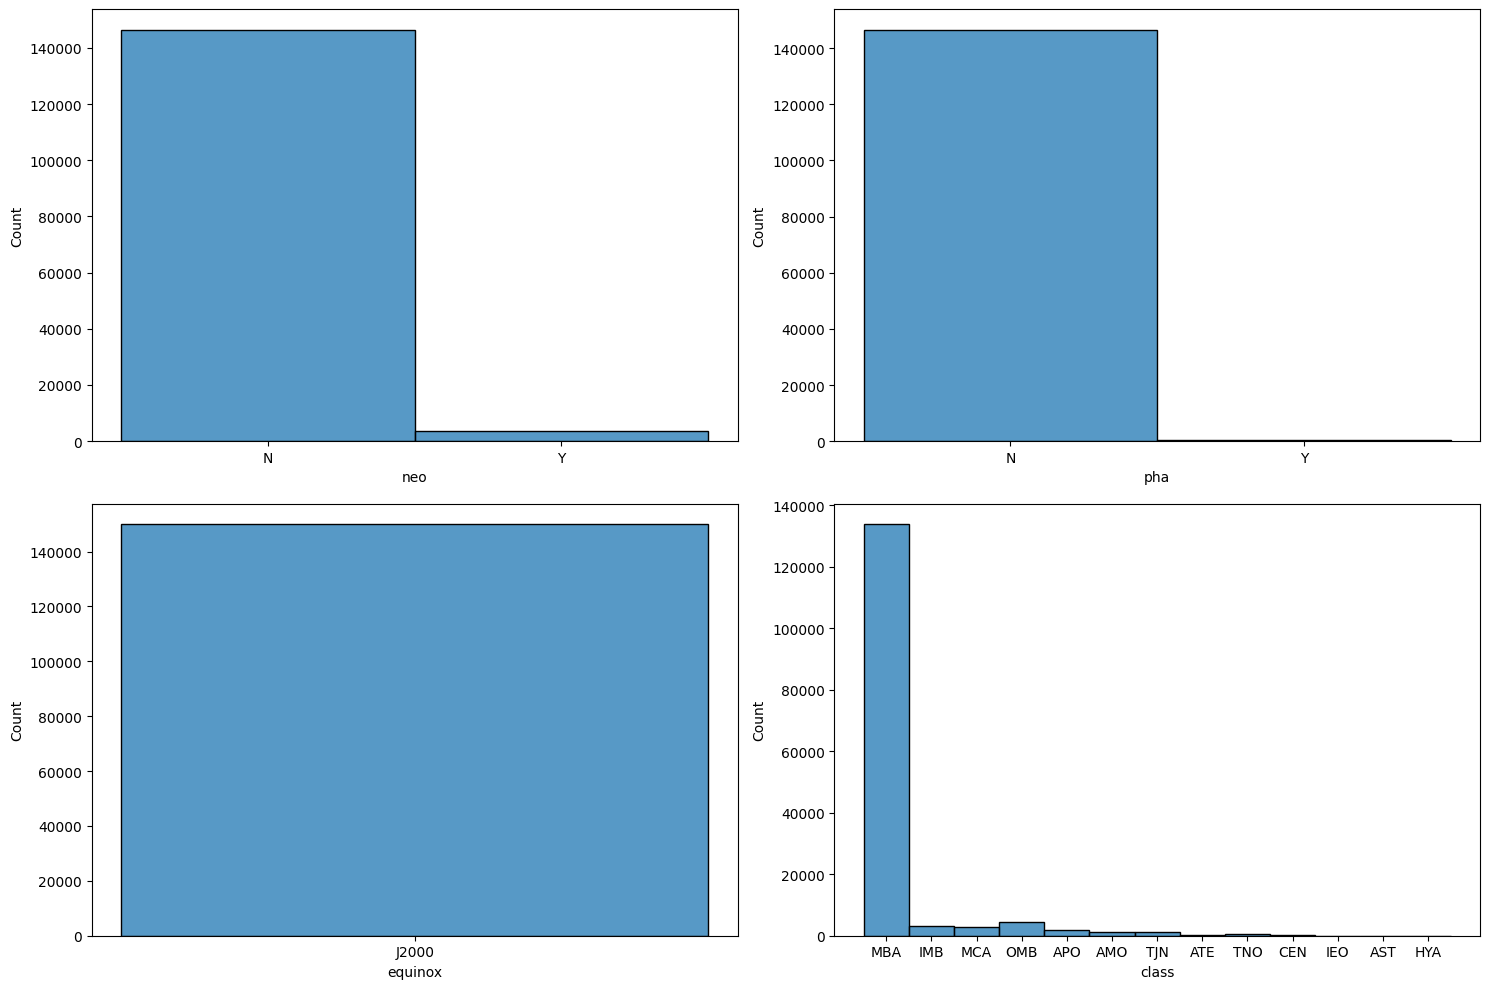

In [132]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(2, 2, figsize = (15, 10))

sns.histplot(ax = axis[0][0], data = sample_total_data, x = "neo")
sns.histplot(ax = axis[0][1], data = sample_total_data, x = "pha")
sns.histplot(ax = axis[1][0], data = sample_total_data, x = "equinox")
sns.histplot(ax = axis[1][1], data = sample_total_data, x = "class")

plt.tight_layout()
plt.show()

**Conclusiones**:

- ``neo``: la mayoría de objetos no son cercanos a la tierra.

- ``pha``: la mayoría de objetos no son potencialmente peligroso.

- ``equinox``: sólo existe una categoría, podemos eliminarla.

- ``class``: la mayoría de asterioides son de clase MBA (Main Belt Asteroid). Son asteroides procedentes del cinturón principal que se encuentra entre Marte y Júpiter


**Eliminación de información irrelevante a partir del análisis univariante de variables categóricas:**

Eliminamos `equinox` por sólo tener una categoría

In [97]:
sample_total_data.drop(["equinox"], axis = 1, inplace = True)
sample_total_data.head(1)

,neo,pha,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,...,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,class
0,N,N,15.5,2.274,0.284,0.412,2459000.5,59000,20200531.0,0.167687,...,189.127461,2.572074,0.301487,2.459567e+06,2.021122e+07,1194.080426,3.269214,0.836183,325.417338,MBA


- **Análisis univariante variables numéricas** ``H``, ``diameter``, ``diameter_sigma``, ``albedo``, ``epoch``, ``epoch_mjd``, ``epoch_cal``, ``e``, ``a``, ``q``, ``i``, ``om``, ``w``, ``ma``, ``ad``, ``n``, ``tp``, ``tp_cal``, ``per``, ``per_y``, ``moid``, ``moid_ld``


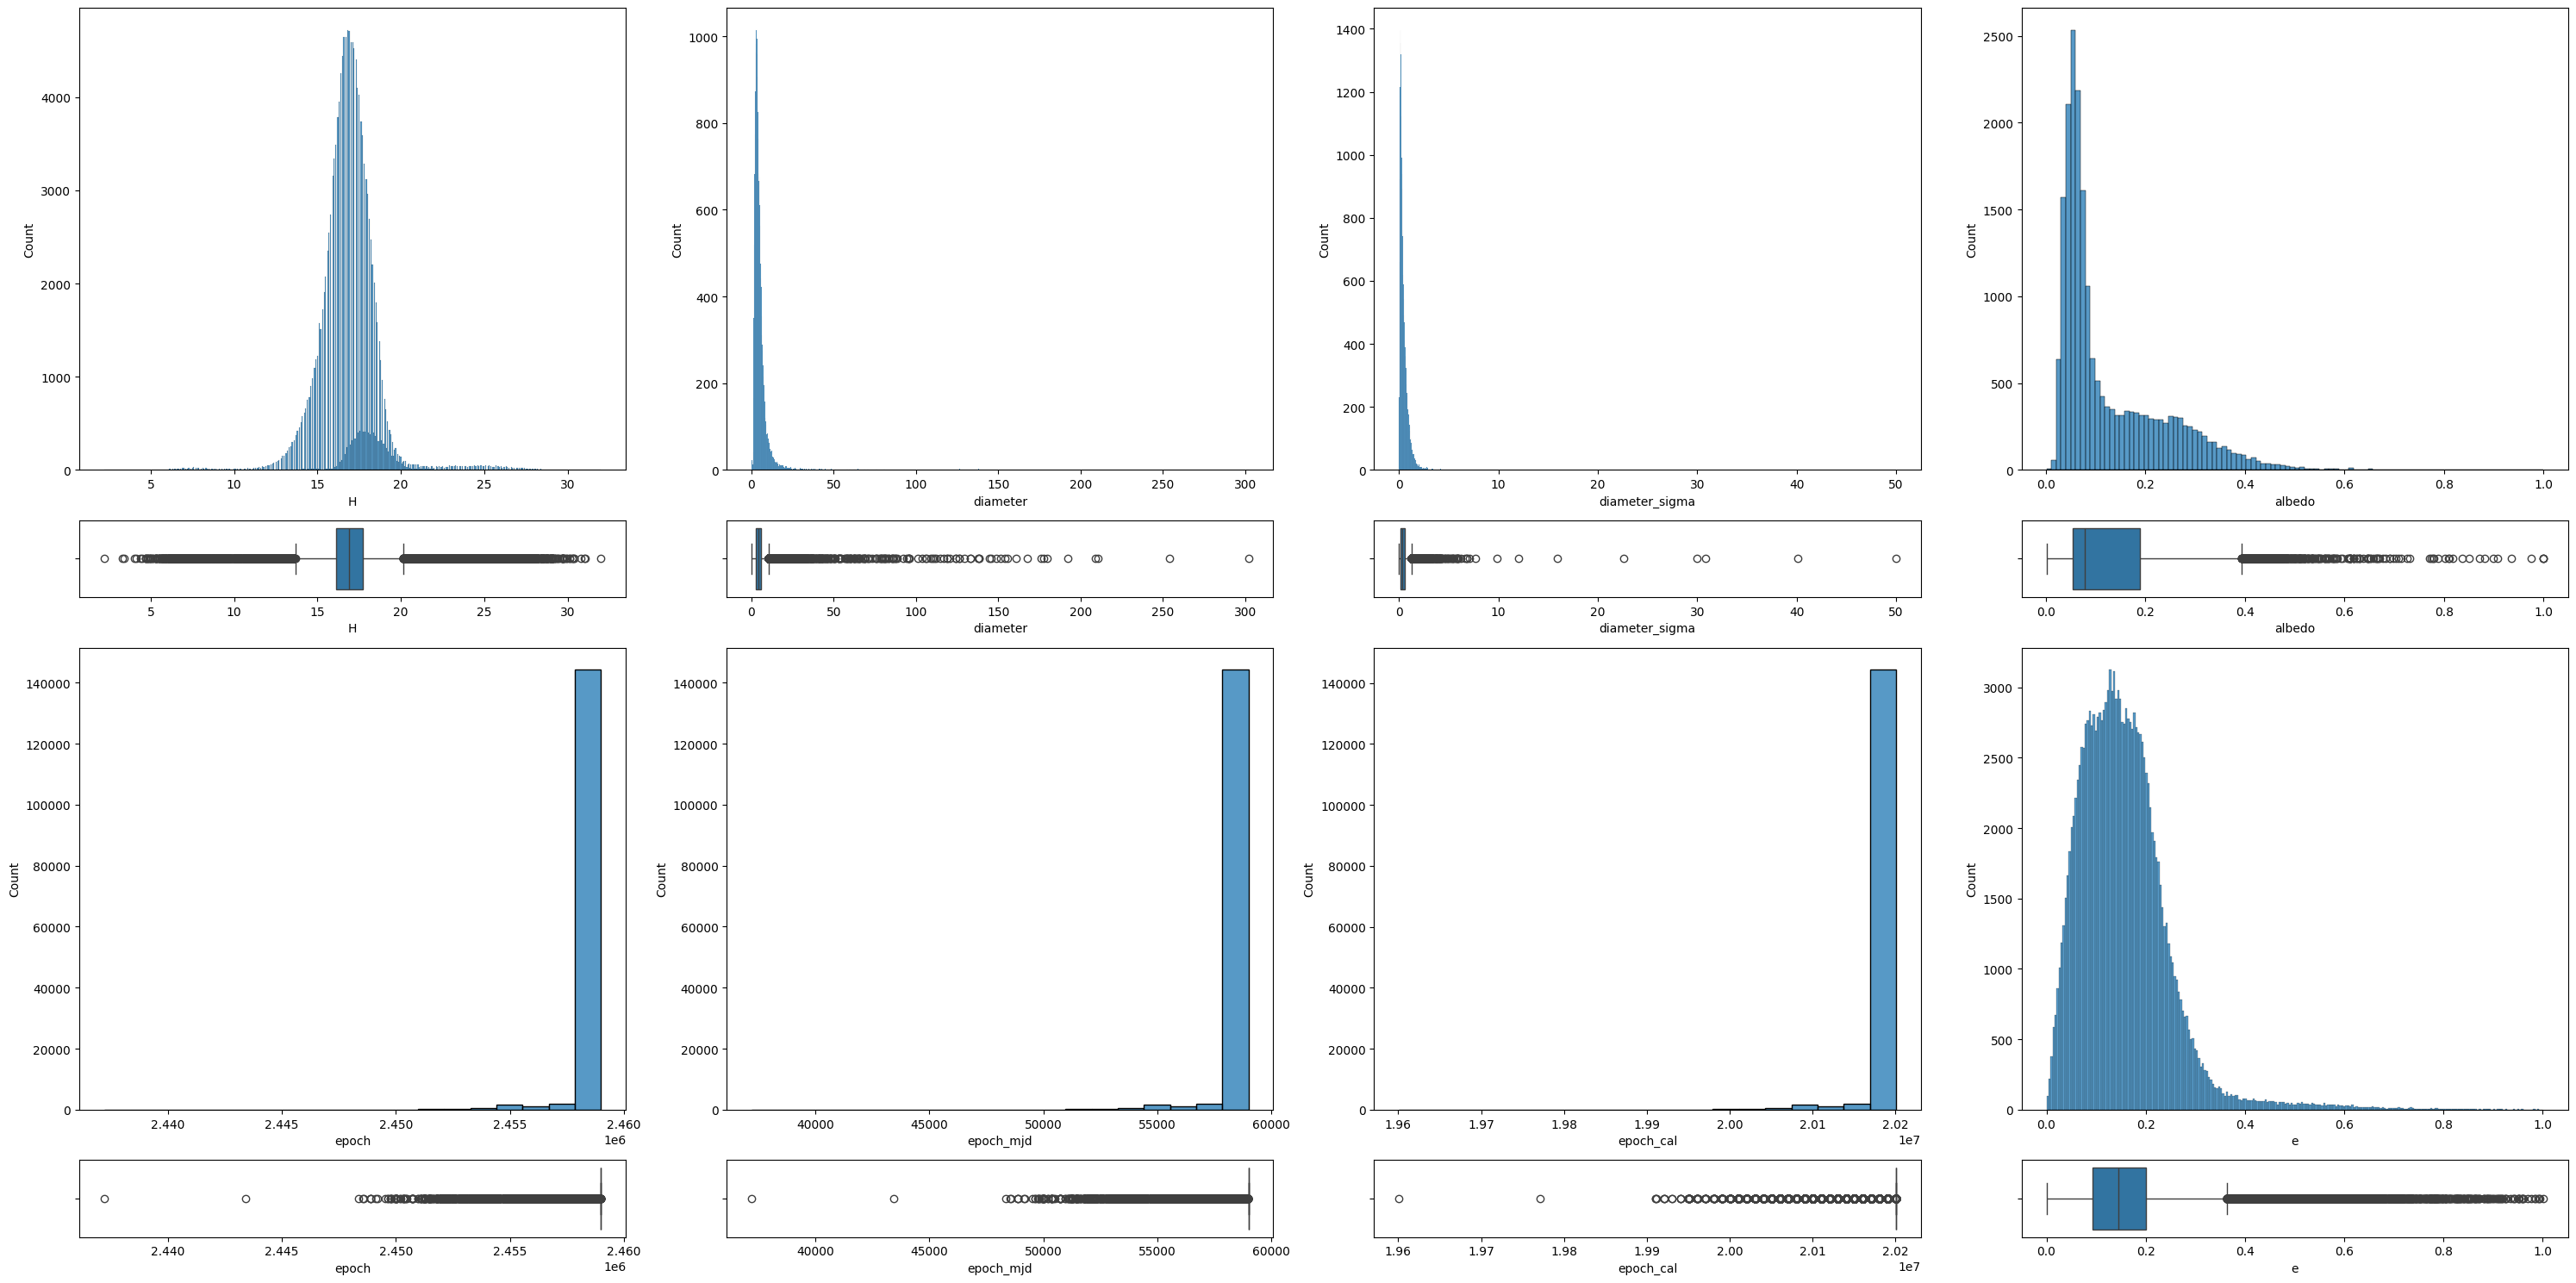

In [134]:

fig, axis = plt.subplots(4, 4, figsize = (30, 15), gridspec_kw={'height_ratios': [6, 1, 6, 1]})


sns.histplot(ax = axis[0, 0], data = sample_total_data, x = "H")
sns.boxplot(ax = axis[1, 0], data = sample_total_data, x = "H")

sns.histplot(ax = axis[0, 1], data = sample_total_data, x = "diameter") 
sns.boxplot(ax = axis[1, 1], data = sample_total_data, x = "diameter")

sns.histplot(ax = axis[0, 2], data = sample_total_data, x = "diameter_sigma")
sns.boxplot(ax = axis[1, 2], data = sample_total_data, x = "diameter_sigma")

sns.histplot(ax = axis[0, 3], data = sample_total_data, x = "albedo") 
sns.boxplot(ax = axis[1, 3], data = sample_total_data, x = "albedo")

sns.histplot(ax = axis[2, 0], data = sample_total_data, x = "epoch")
sns.boxplot(ax = axis[3, 0], data = sample_total_data, x = "epoch")

sns.histplot(ax = axis[2, 1], data = sample_total_data, x = "epoch_mjd") 
sns.boxplot(ax = axis[3, 1], data = sample_total_data, x = "epoch_mjd")

sns.histplot(ax = axis[2, 2], data = sample_total_data, x = "epoch_cal")
sns.boxplot(ax = axis[3, 2], data = sample_total_data, x = "epoch_cal")

sns.histplot(ax = axis[2, 3], data = sample_total_data, x = "e")
sns.boxplot(ax = axis[3, 3], data = sample_total_data, x = "e")

plt.tight_layout()

plt.show()


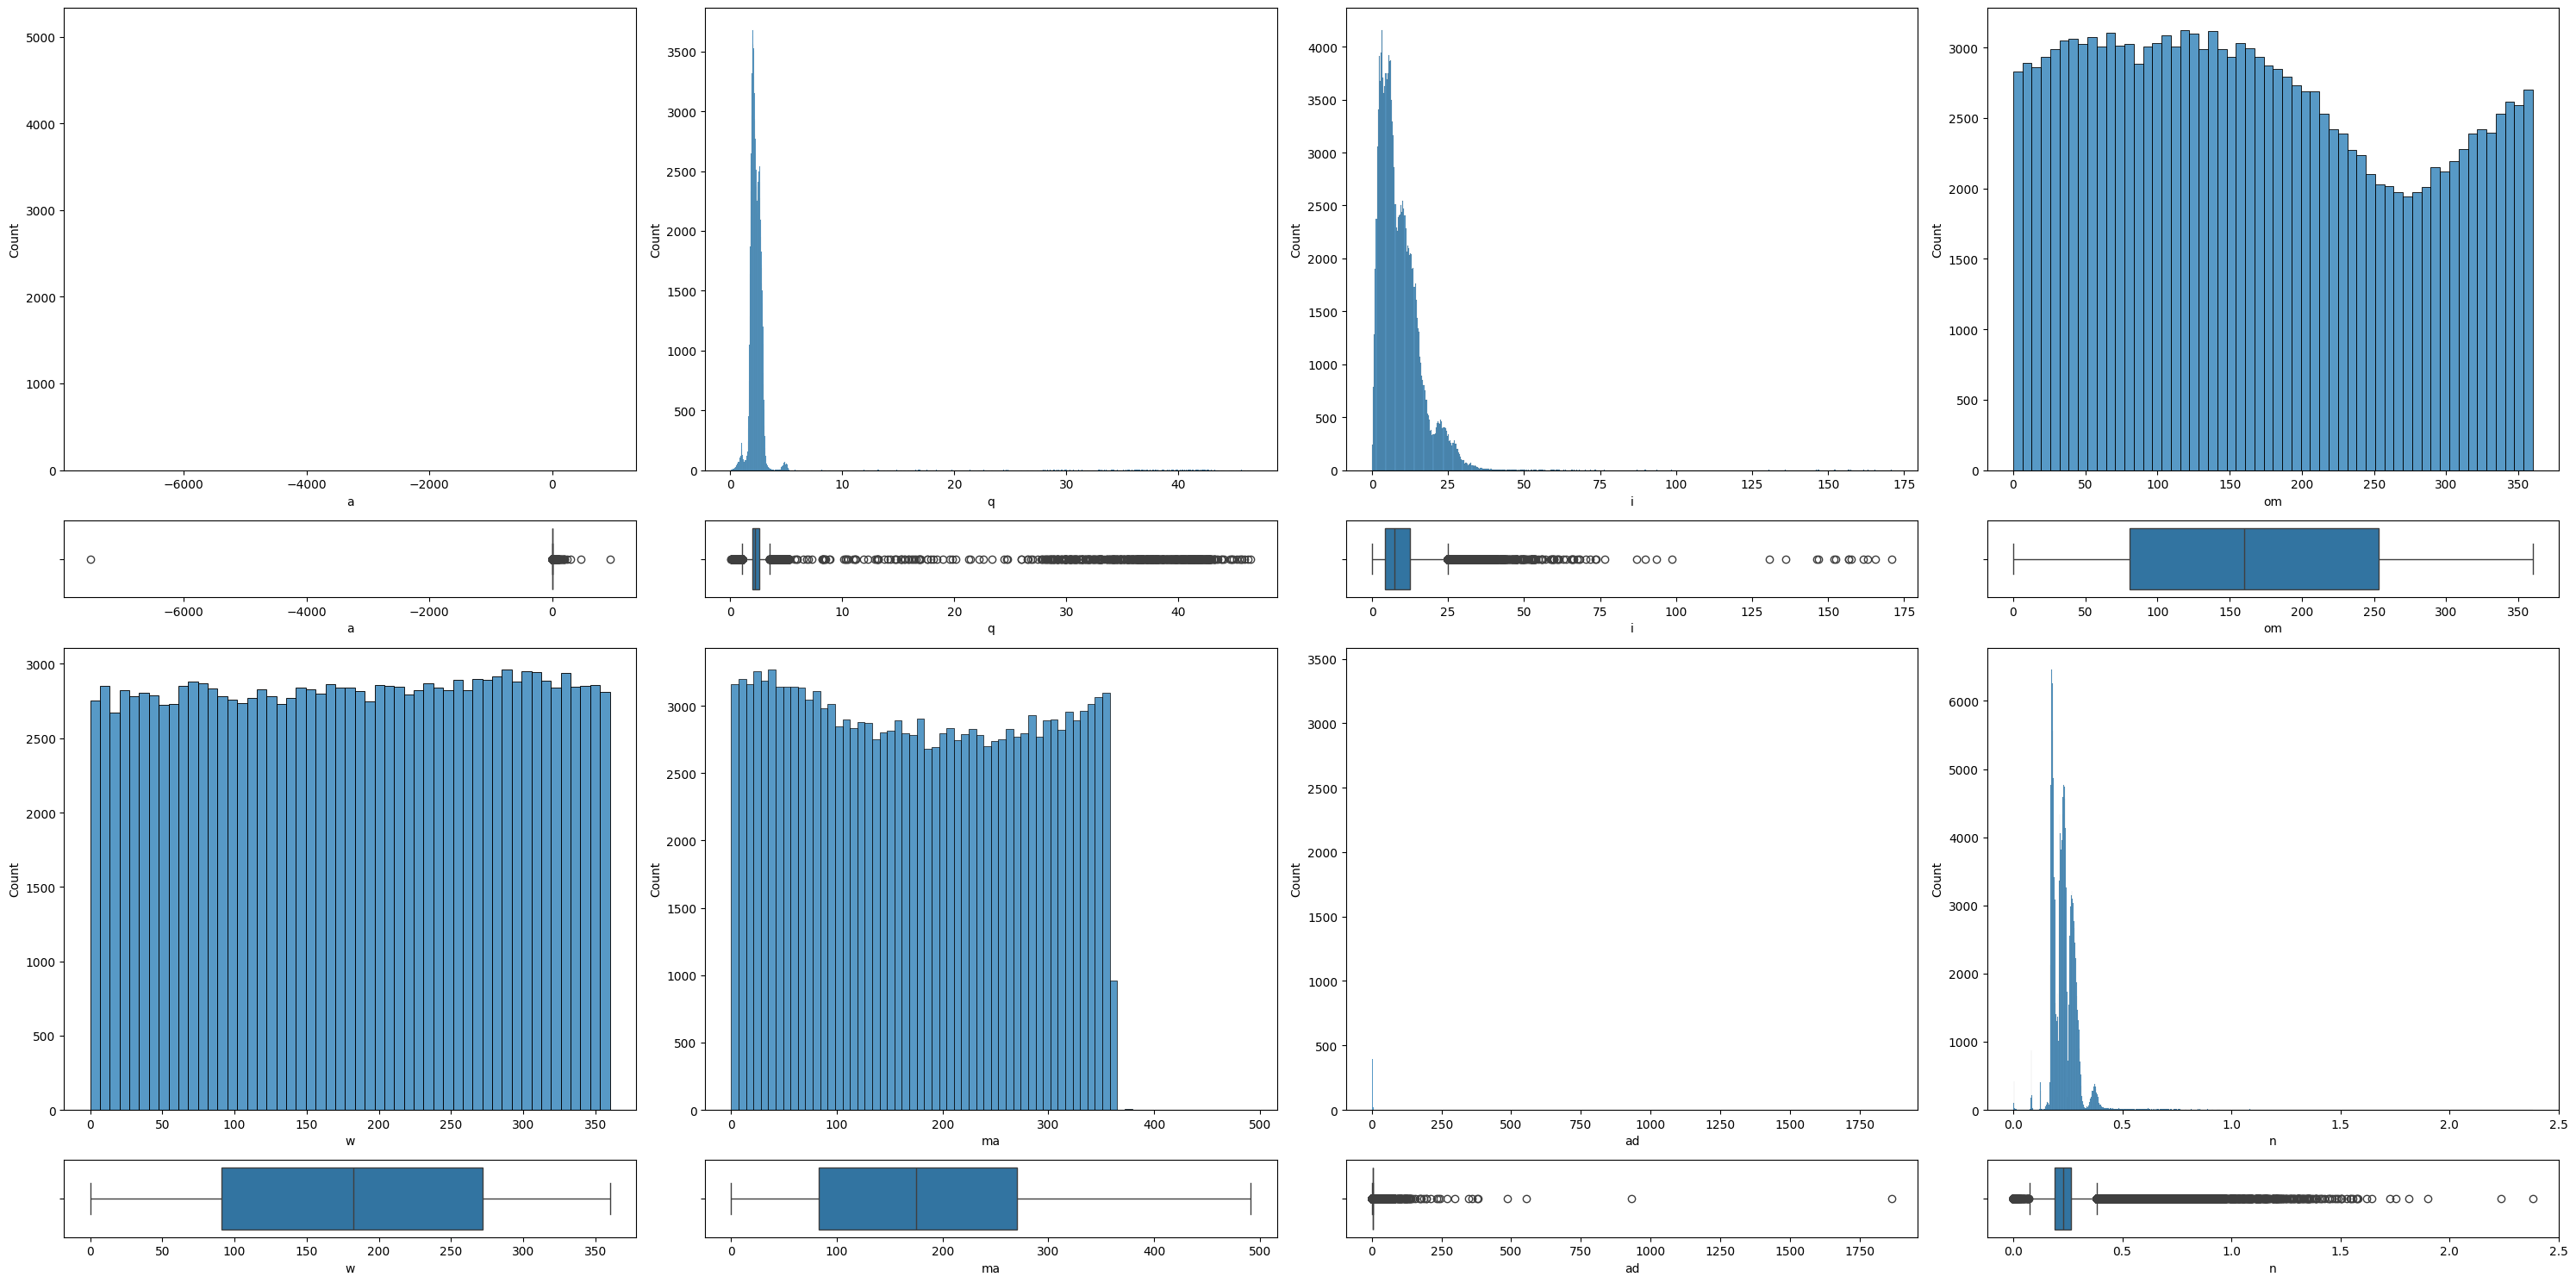

In [135]:

fig, axis = plt.subplots(4, 4, figsize = (30, 15), gridspec_kw={'height_ratios': [6, 1, 6, 1]})


sns.histplot(ax = axis[0, 0], data = sample_total_data, x = "a")
sns.boxplot(ax = axis[1, 0], data = sample_total_data, x = "a")

sns.histplot(ax = axis[0, 1], data = sample_total_data, x = "q") 
sns.boxplot(ax = axis[1, 1], data = sample_total_data, x = "q")

sns.histplot(ax = axis[0, 2], data = sample_total_data, x = "i")
sns.boxplot(ax = axis[1, 2], data = sample_total_data, x = "i")

sns.histplot(ax = axis[0, 3], data = sample_total_data, x = "om") 
sns.boxplot(ax = axis[1, 3], data = sample_total_data, x = "om")

sns.histplot(ax = axis[2, 0], data = sample_total_data, x = "w")
sns.boxplot(ax = axis[3, 0], data = sample_total_data, x = "w")

sns.histplot(ax = axis[2, 1], data = sample_total_data, x = "ma") 
sns.boxplot(ax = axis[3, 1], data = sample_total_data, x = "ma")

sns.histplot(ax = axis[2, 2], data = sample_total_data, x = "ad")
sns.boxplot(ax = axis[3, 2], data = sample_total_data, x = "ad")

sns.histplot(ax = axis[2, 3], data = sample_total_data, x = "n")
sns.boxplot(ax = axis[3, 3], data = sample_total_data, x = "n")

plt.tight_layout()

plt.show()

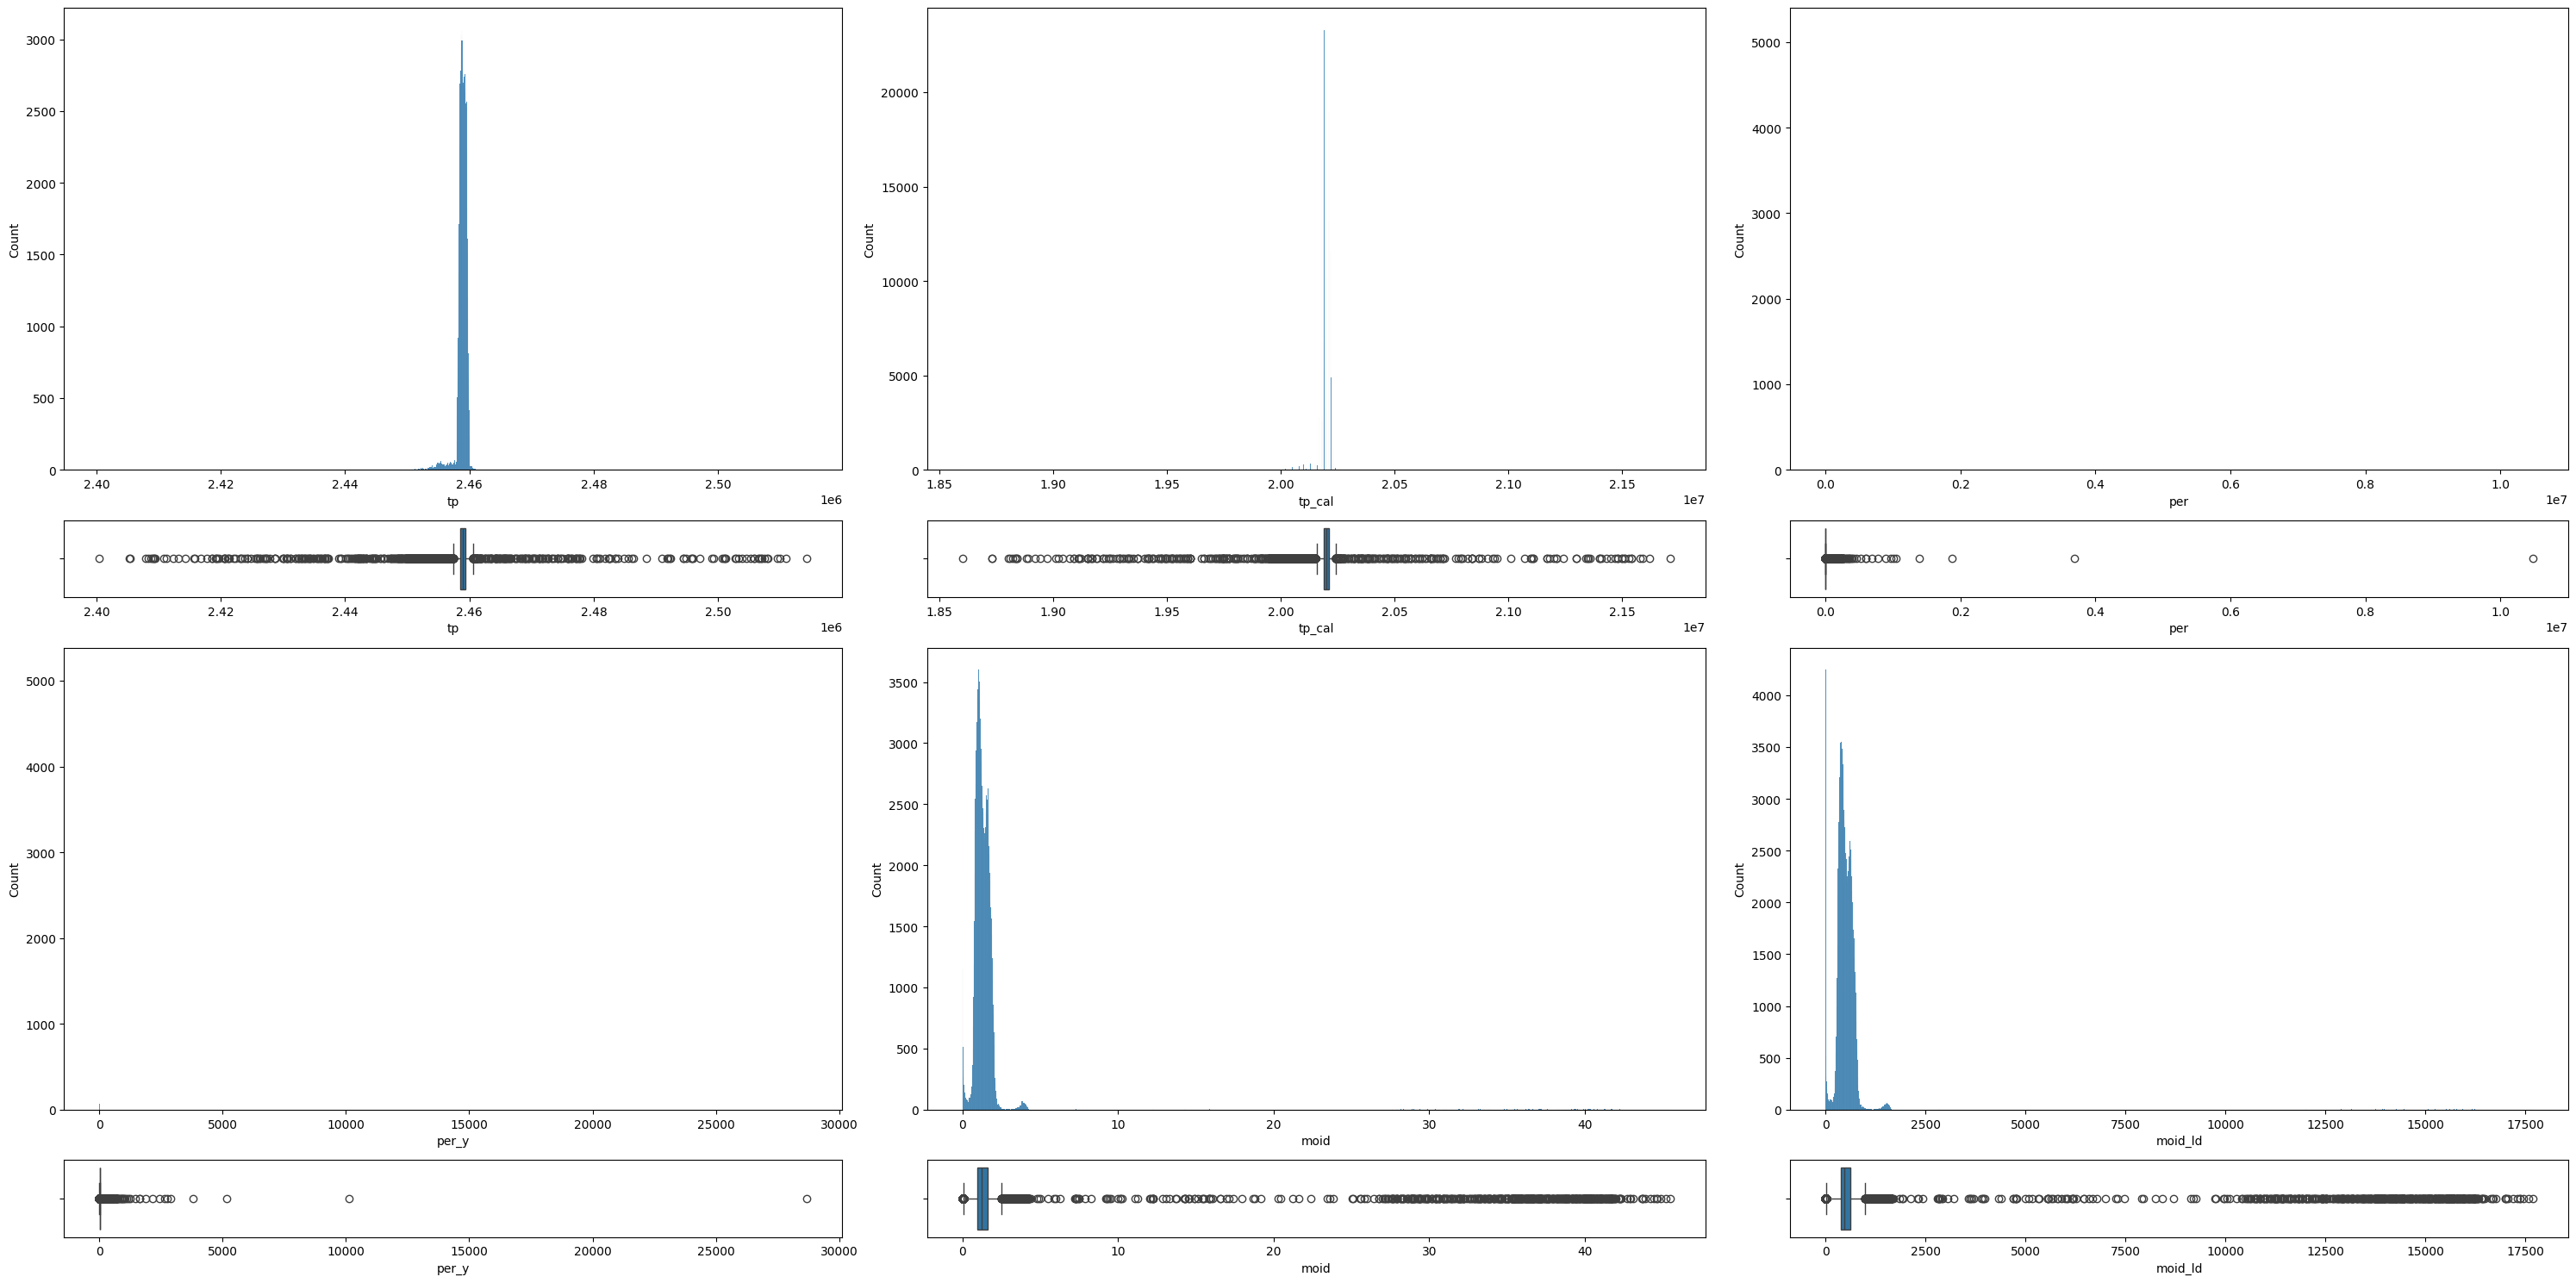

In [136]:
fig, axis = plt.subplots(4, 3, figsize = (30, 15), gridspec_kw={'height_ratios': [6, 1, 6, 1]})


sns.histplot(ax = axis[0, 0], data = sample_total_data, x = "tp")
sns.boxplot(ax = axis[1, 0], data = sample_total_data, x = "tp")

sns.histplot(ax = axis[0, 1], data = sample_total_data, x = "tp_cal") 
sns.boxplot(ax = axis[1, 1], data = sample_total_data, x = "tp_cal")

sns.histplot(ax = axis[0, 2], data = sample_total_data, x = "per")
sns.boxplot(ax = axis[1, 2], data = sample_total_data, x = "per")

sns.histplot(ax = axis[2, 0], data = sample_total_data, x = "per_y") 
sns.boxplot(ax = axis[3, 0], data = sample_total_data, x = "per_y")

sns.histplot(ax = axis[2, 1], data = sample_total_data, x = "moid")
sns.boxplot(ax = axis[3, 1], data = sample_total_data, x = "moid")

sns.histplot(ax = axis[2, 2], data = sample_total_data, x = "moid_ld") 
sns.boxplot(ax = axis[3, 2], data = sample_total_data, x = "moid_ld")

plt.tight_layout()

plt.show()

**Eliminación de información irrelevante a partir del análisis univariante de variables numéricas:**

Eliminación de `epoch` y `epoch_cal` al ser redundantes con ``epoch_mjd`` (la que está modificada para ser mas manejable)

In [98]:
sample_total_data.drop(['epoch','epoch_cal'], axis = 1, inplace = True)
sample_total_data.head(1)

,neo,pha,H,diameter,albedo,diameter_sigma,epoch_mjd,e,a,q,...,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,class
0,N,N,15.5,2.274,0.284,0.412,59000,0.167687,2.202707,1.833341,...,189.127461,2.572074,0.301487,2.459567e+06,2.021122e+07,1194.080426,3.269214,0.836183,325.417338,MBA


**4. Análisis de variables multivariante**

- **Analisis de variables categorica - categorica**

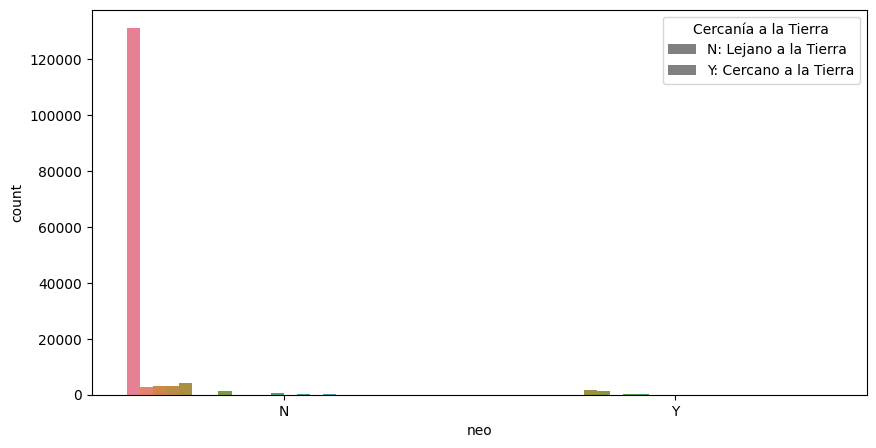

In [138]:

sample_total_data['combined_hue'] = (sample_total_data['pha'].astype(str) + '_' +
                                     
                                     sample_total_data['class'].astype(str))


fig, axis = plt.subplots(figsize=(10, 5))

sns.countplot(data=sample_total_data, x="neo", hue="combined_hue", ax=axis, legend=False)

legend_labels = {'N_NEO_orbit_id_equinox_class': 'N: Lejano a la Tierra',
                 'Y_NEO_orbit_id_equinox_class': 'Y: Cercano a la Tierra'}


handles = []
for key, label in legend_labels.items():
    handles.append(axis.bar(0, 0, color='gray', label=label))  

axis.legend(handles=handles, labels=legend_labels.values(), loc='upper right', title='Cercanía a la Tierra')


plt.show()

**Conclusión:**
- El mayor porcentaje de asteroides está lejos del planeta tierra.

Análisis de correlaciones variables categóricas

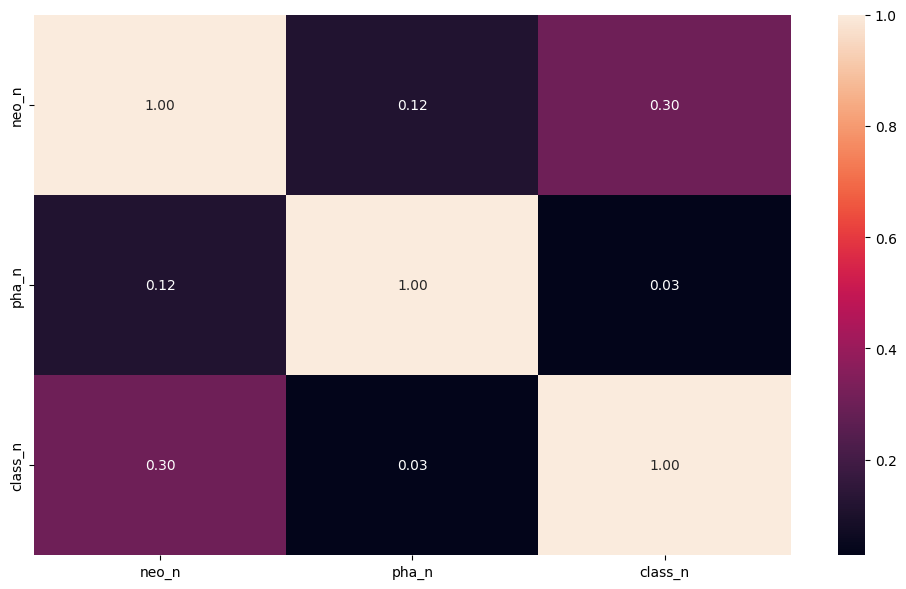

In [99]:
sample_total_data["neo_n"] = pd.factorize(sample_total_data["neo"])[0]
sample_total_data["pha_n"] = pd.factorize(sample_total_data["pha"])[0]
sample_total_data["class_n"] = pd.factorize(sample_total_data["class"])[0]

fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(sample_total_data[["neo_n", "pha_n", "class_n"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

- **Análisis numérico-numérico**

Se elije la variable `moid` como variable objetivo, al describir la distancia mas cercana a la órbita terrestre.

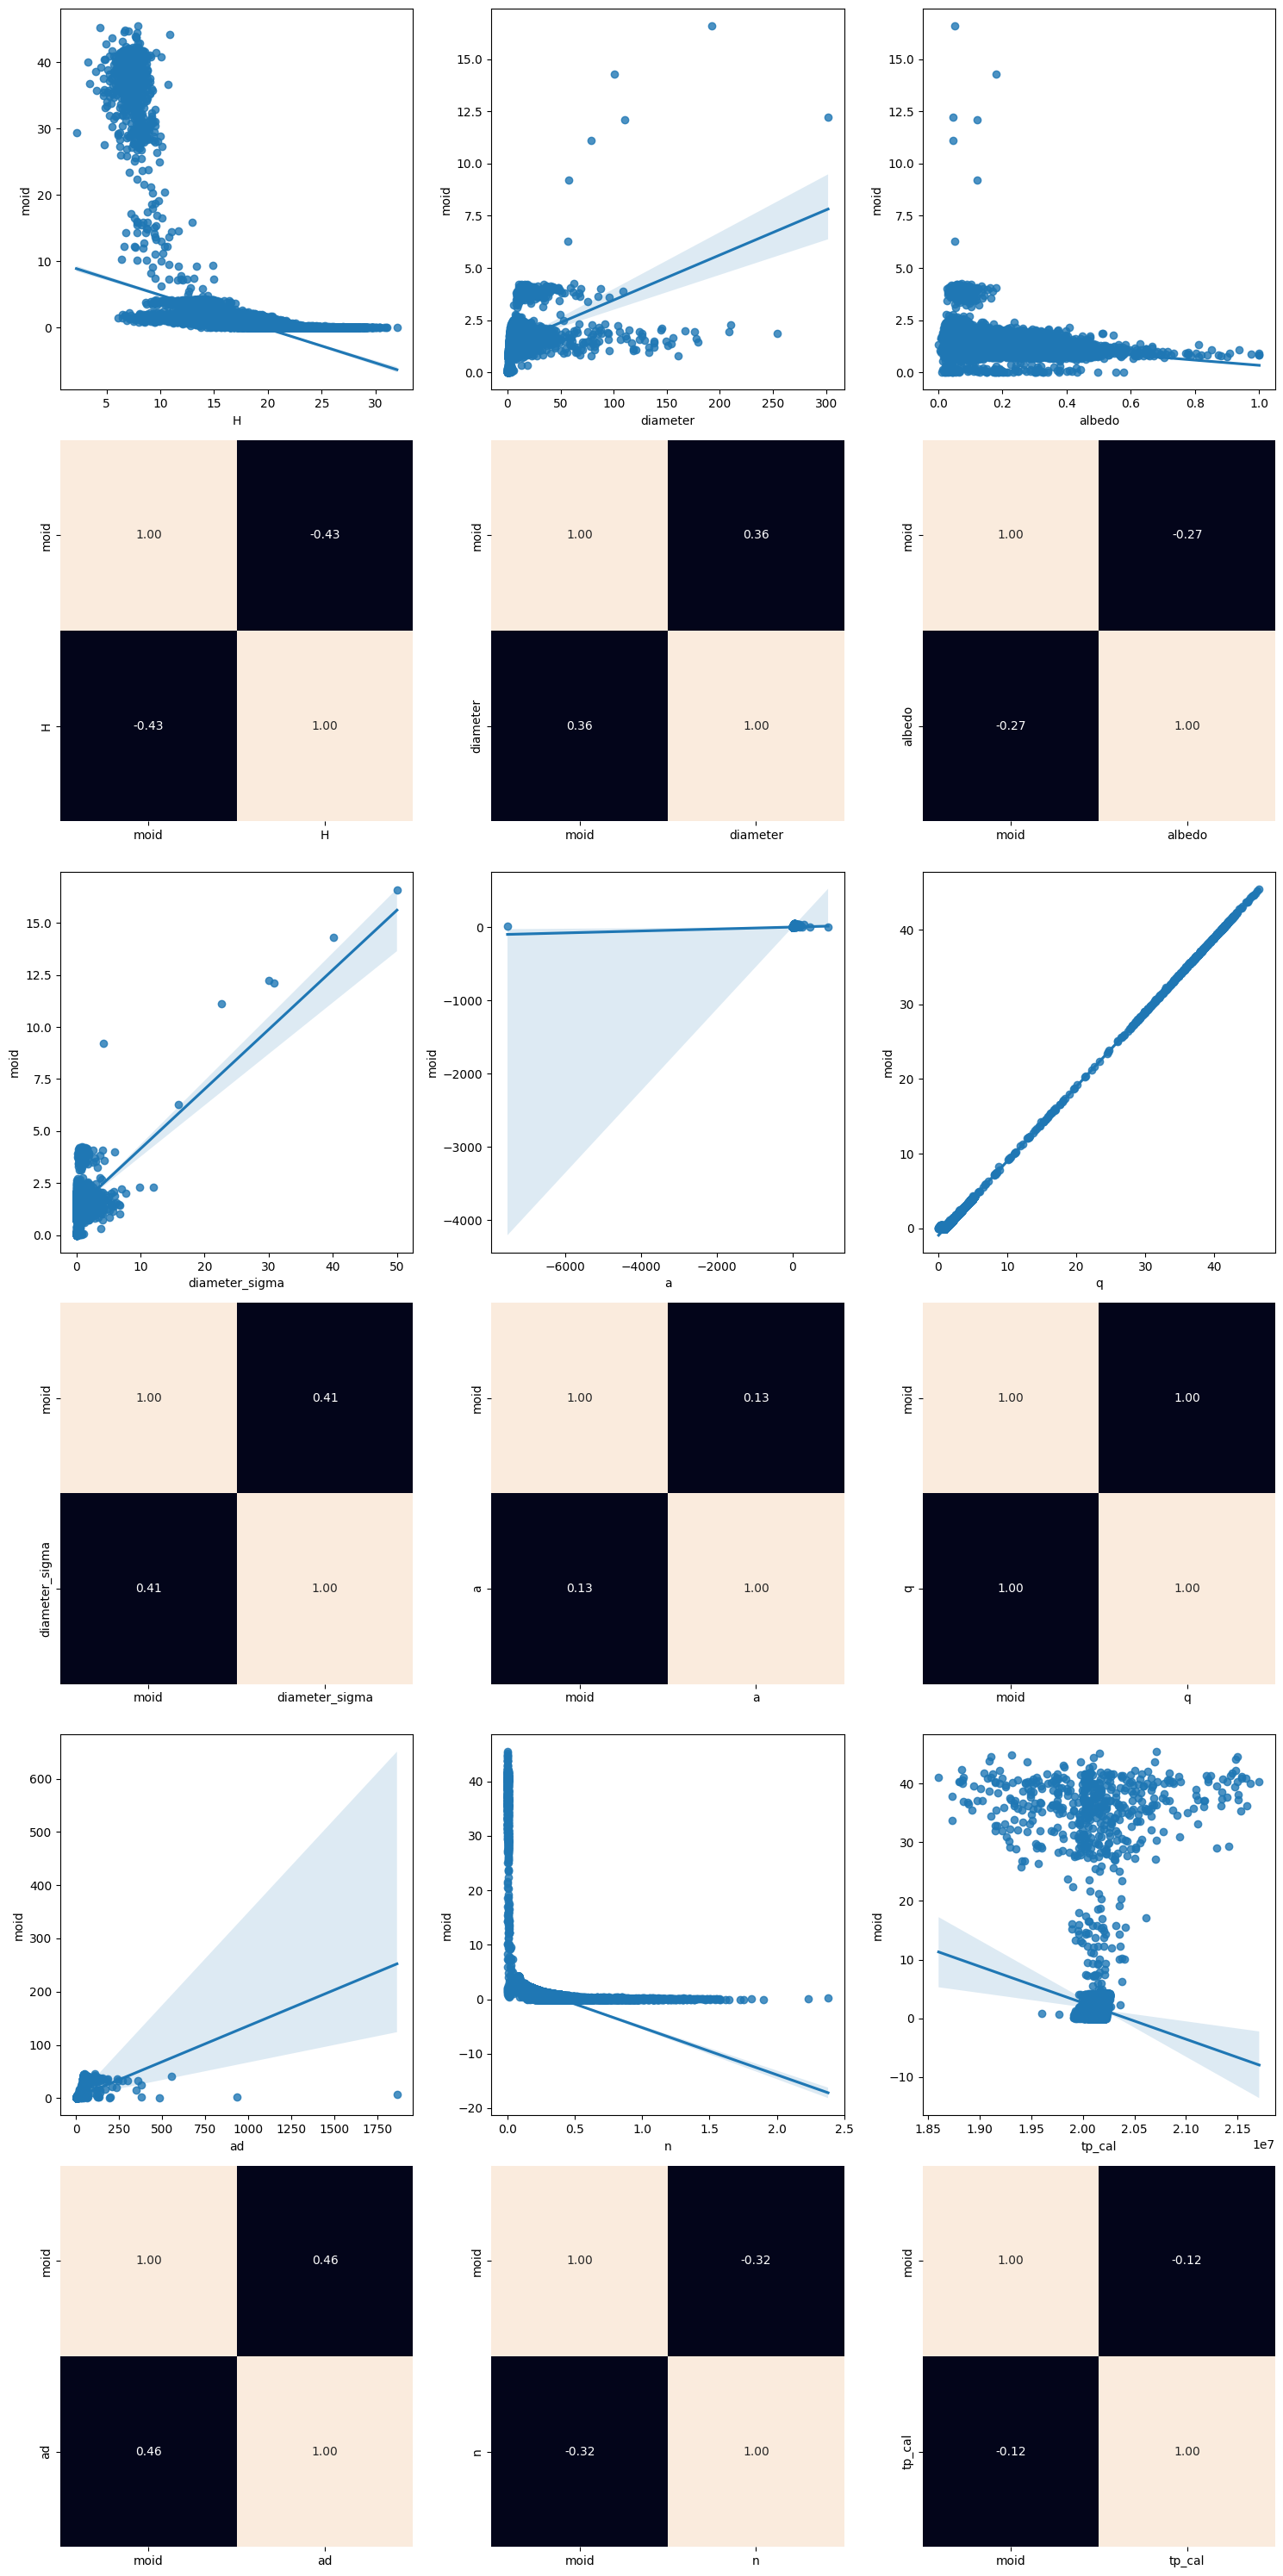

In [140]:
fig, axis = plt.subplots(6, 3, figsize=(15, 30))


sns.regplot(data=sample_total_data, x="H", y="moid", ax=axis[0, 0]) 
sns.heatmap(sample_total_data[["moid", "H"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)

sns.regplot(data=sample_total_data, x="diameter", y="moid", ax=axis[0, 1]) 
sns.heatmap(sample_total_data[["moid", "diameter"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1], cbar=False)

sns.regplot(data=sample_total_data, x="albedo", y="moid", ax=axis[0, 2]) 
sns.heatmap(sample_total_data[["moid", "albedo"]].corr(), annot=True, fmt=".2f", ax=axis[1, 2], cbar=False)

sns.regplot(data=sample_total_data, x="diameter_sigma", y="moid", ax=axis[2, 0]) 
sns.heatmap(sample_total_data[["moid", "diameter_sigma"]].corr(), annot=True, fmt=".2f", ax=axis[3, 0], cbar=False)

sns.regplot(data=sample_total_data, x="a", y="moid", ax=axis[2, 1]) 
sns.heatmap(sample_total_data[["moid", "a"]].corr(), annot=True, fmt=".2f", ax=axis[3, 1], cbar=False)

sns.regplot(data=sample_total_data, x="q", y="moid", ax=axis[2, 2]) 
sns.heatmap(sample_total_data[["moid", "q"]].corr(), annot=True, fmt=".2f", ax=axis[3, 2], cbar=False)

sns.regplot(data=sample_total_data, x="ad", y="moid", ax=axis[4, 0]) 
sns.heatmap(sample_total_data[["moid", "ad"]].corr(), annot=True, fmt=".2f", ax=axis[5, 0], cbar=False)

sns.regplot(data=sample_total_data, x="n", y="moid", ax=axis[4, 1]) 
sns.heatmap(sample_total_data[["moid", "n"]].corr(), annot=True, fmt=".2f", ax=axis[5, 1], cbar=False)

sns.regplot(data=sample_total_data, x="tp_cal", y="moid", ax=axis[4, 2]) 
sns.heatmap(sample_total_data[["moid", "tp_cal"]].corr(), annot=True, fmt=".2f", ax=axis[5, 2], cbar=False)


plt.tight_layout()
plt.show()


**Conclusiones**

- `moid` vs `H`:  Correlación negativa moderada (-0.43), lo que sugiere que a medida que `H` aumenta, `moid` tiende a disminuir.

- `moid` vs `diameter`:  Correlación positiva moderada (0.33), indicando que a mayor `diameter`, mayor `moid`.

- `moid` vs `albedo`: Correlación negativa débil (-0.26), sugiriendo una leve tendencia a que `moid` disminuya con un aumento en `albedo`.

- `moid` vs `diameter_sigma`: Correlación positiva moderada (0.43), indicando que a mayor incertidumbre en el `diameter` (`diameter_sigma`), mayor `moid`.

- `moid` vs `a`: Correlación positiva débil (0.14), indicando una ligera tendencia a que `moid` aumente con el semieje mayor (`a`).

- `moid` vs `q`: Correlación positiva fuerte (1.00), indicando una correlación casi perfecta entre `moid` y `q`.

- `moid` vs `ad`: Correlación positiva muy débil (0.09), sugiriendo que casi no hay relación entre `moid` y `ad`.

- `moid` vs `n`: Correlación negativa moderada (-0.32), indicando que a mayor número de observaciones (`n`), menor `moid`.

- `moid` vs `tp_cal`: Correlación negativa débil (-0.10), sugiriendo una ligera tendencia a que `moid` disminuya con el tiempo perihelio (`tp_cal`).



**Eliminación de información irrelevante a partir del análisis multivariante de variables numéricas:**

Eliminamos `per` y `moid_Id` por ser información irrelevante, las demás por no tener correlación.

Eliminamos `epoch_mjd`,`e`, `i`, `om`, `w`, `ma`, `tp` por no tener correlación con nuestra variable objetivo `moid`


In [100]:
sample_total_data.drop(["per","moid_ld", "epoch_mjd","e", "i", "om", "w", "ma", "tp"], axis = 1, inplace = True)
sample_total_data.head(1)

,neo,pha,H,diameter,albedo,diameter_sigma,a,q,ad,n,tp_cal,per_y,moid,class,neo_n,pha_n,class_n
0,N,N,15.5,2.274,0.284,0.412,2.202707,1.833341,2.572074,0.301487,2.021122e+07,3.269214,0.836183,MBA,0,0,0


- **Análisis numérico-categórico completo.**

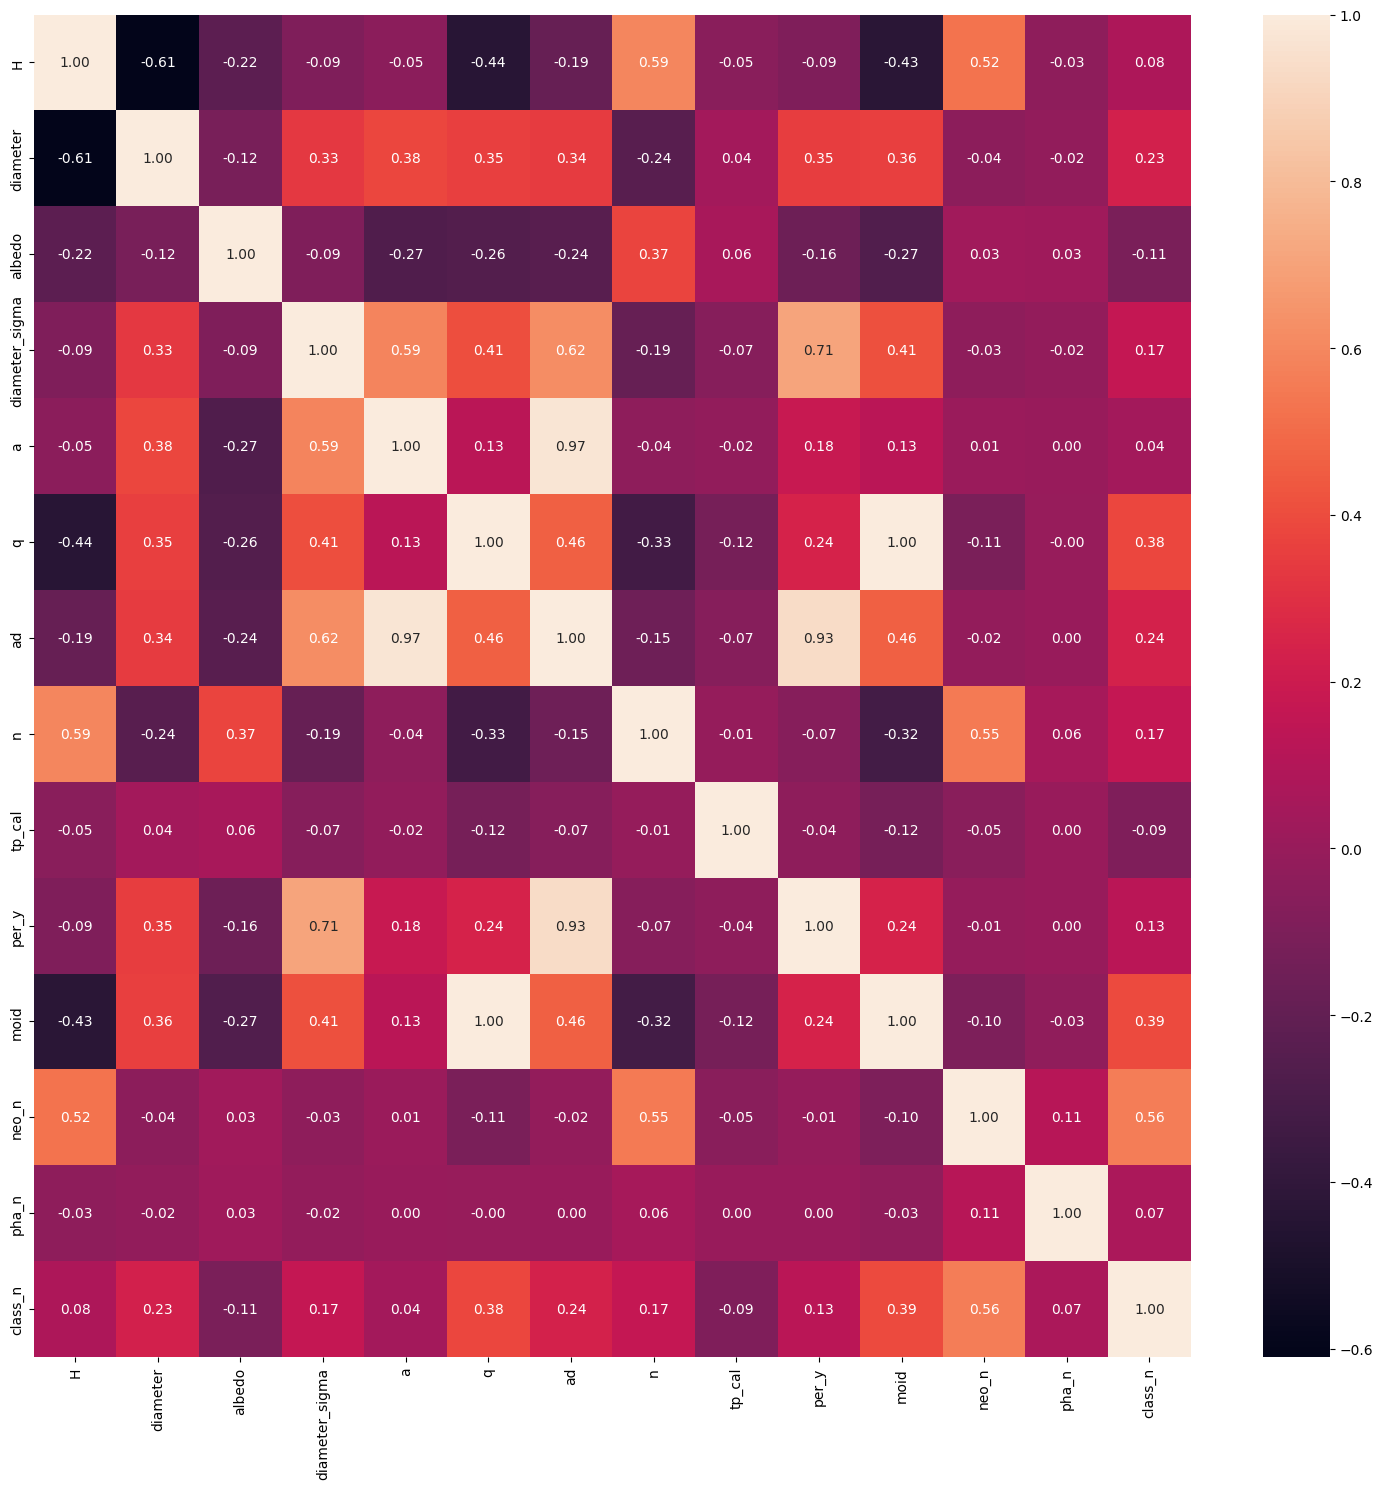

In [142]:

fig, axis = plt.subplots(figsize = (15, 15))

sns.heatmap(sample_total_data[['H', 'diameter', 'albedo', 'diameter_sigma', 'a', 'q', 'ad', 'n', 'tp_cal', 'per_y', 'moid', 'neo_n', 'pha_n', 'class_n']].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

**Conclusiones**:

- `moid` vs `H`: Correlación negativa moderada (-0.43), lo que sugiere que a medida que la magnitud absoluta (`H`) aumenta, el valor de `moid` tiende a disminuir. Esto implica que los objetos más brillantes (con menor `H`) suelen tener una menor distancia mínima de intersección orbital con la Tierra.

- `moid` vs `diameter`: Correlación positiva moderada (0.33), indicando que a mayor diámetro (`diameter`), mayor es el valor de `moid`. Esto puede sugerir que los objetos más grandes tienden a tener una mayor distancia mínima de intersección orbital con la Tierra.

- `moid` vs `albedo`: Correlación negativa débil (-0.26), sugiriendo que a medida que el albedo (`albedo`) aumenta, el valor de `moid` tiende a disminuir levemente. Esto podría indicar que los objetos más reflectantes tienen una menor distancia mínima de intersección orbital con la Tierra.

- `moid` vs `diameter_sigma`: Correlación positiva moderada (0.43), indicando que a mayor incertidumbre en el diámetro (`diameter_sigma`), mayor es el valor de `moid`. Esto sugiere que los objetos con mayor variabilidad en las estimaciones de su tamaño tienden a tener una mayor distancia mínima de intersección orbital con la Tierra.

- `moid` vs `a`: Correlación positiva débil (0.14), indicando que a mayor semieje mayor (`a`), el valor de `moid` tiende a aumentar levemente. Esto puede sugerir que los objetos con órbitas más grandes tienden a tener una mayor distancia mínima de intersección orbital con la Tierra.

- `moid` vs `q`: Correlación positiva fuerte (1.00), indicando una correlación casi perfecta entre `moid` y el perihelio (`q`). Esto es esperable, ya que ambos parámetros están directamente relacionados con la distancia mínima del objeto respecto al Sol y la Tierra.

- `moid` vs `ad`: Correlación positiva muy débil (0.09), sugiriendo que casi no hay relación entre `moid` y la distancia del afelio (`ad`). Esto indica que la distancia mínima de intersección orbital con la Tierra no está significativamente afectada por la distancia del objeto en su afelio.

- `moid` vs `n`: Correlación negativa moderada (-0.32), indicando que a mayor número de observaciones (`n`), el valor de `moid` tiende a disminuir. Esto podría sugerir que los objetos observados con mayor frecuencia tienden a acercarse más a la Tierra.

- `moid` vs `class_n`: Correlación positiva débil (0.20), indicando que hay una leve relación positiva entre `moid` y `class_n`. Esto puede sugerir que diferentes clases de objetos tienen variaciones en sus distancias mínimas de intersección orbital con la Tierra, sin embargo, _se conservará esta variable por ser el ID identificativo de cada asteriode_.


**Eliminación de variables numéricas-categóricas por no tener correlación con variable objetivo ``moid``**: `neo_n`, `pha_n` y sus correspondientes categóricas

In [101]:
sample_total_data.drop(["neo_n","pha_n","class", "neo", "pha"], axis = 1, inplace = True)
sample_total_data.head(1)

,H,diameter,albedo,diameter_sigma,a,q,ad,n,tp_cal,per_y,moid,class_n
0,15.5,2.274,0.284,0.412,2.202707,1.833341,2.572074,0.301487,2.021122e+07,3.269214,0.836183,0


Contabilización de columnas numéricas y categóricas después del análisis multivariante.

In [102]:

numeric_columns = sample_total_data.select_dtypes(include=['float64','int64']).columns.tolist()
categorical_columns = sample_total_data.select_dtypes(include=['object', 'category']).columns.tolist()


print(f'Número de columnas numéricas: {len(numeric_columns)}')
print('Columnas numéricas:', numeric_columns)

print(f'Número de columnas categóricas: {len(categorical_columns)}')
print('Columnas categóricas:', categorical_columns)

Número de columnas numéricas: 12
Columnas numéricas: ['H', 'diameter', 'albedo', 'diameter_sigma', 'a', 'q', 'ad', 'n', 'tp_cal', 'per_y', 'moid', 'class_n']
Número de columnas categóricas: 0
Columnas categóricas: []


**5. Ingeniería de características**

**- Análisis de Outliers**

In [145]:
sample_total_data.describe()

,H,diameter,albedo,diameter_sigma,a,q,ad,n,tp_cal,per_y,moid,class_n
count,149011.000000,21175.000000,21013.000000,21154.000000,150000.000000,150000.000000,149999.000000,150000.000000,1.500000e+05,150000.000000,146894.000000,150000.000000
mean,16.907447,5.465168,0.130241,0.481101,2.810278,2.391115,3.329802,0.236438,2.019570e+07,6.015999,1.411068,0.343820
std,1.781056,8.458912,0.110176,0.733799,19.866181,2.088774,7.141036,0.078080,4.103854e+04,84.604628,2.104915,1.162562
min,2.200000,0.008000,0.001000,0.001000,-7520.984443,0.073125,0.793855,0.000002,1.860031e+07,0.000000,0.000004,0.000000
25%,16.100000,2.782000,0.053000,0.179000,2.389258,1.973267,2.781912,0.189486,2.019032e+07,3.693199,0.980649,0.000000
50%,16.900000,3.959000,0.078000,0.331000,2.647798,2.227558,3.048486,0.228758,2.020040e+07,4.308592,1.241960,0.000000
75%,17.715000,5.764000,0.189000,0.617000,3.002051,2.578078,3.367417,0.266876,2.021052e+07,5.201580,1.592817,0.000000
max,32.000000,302.000000,1.000000,50.000000,937.316711,46.477781,1866.277311,2.381039,2.171103e+07,28697.082222,45.468700,12.000000


In [146]:
H_stats = sample_total_data["H"].describe()
H_stats

count    149011.000000
mean         16.907447
std           1.781056
min           2.200000
25%          16.100000
50%          16.900000
75%          17.715000
max          32.000000
Name: H, dtype: float64

In [147]:
h_iqr = H_stats["75%"] - H_stats["25%"]

upper_limit = H_stats["75%"] + 1.5 * h_iqr
limite_inferior = H_stats["25%"] - 1.5 * H_stats

print(f"Los límites superior e inferior para encontrar valores atípicos son {round (upper_limit, 2)} y {round(limite_inferior, 2)}, con un rango intercuartílico de {round(h_iqr, 2)}")

Los límites superior e inferior para encontrar valores atípicos son 20.14 y count   -223500.40
mean         -9.26
std          13.43
min          12.80
25%          -8.05
50%          -9.25
75%         -10.47
max         -31.90
Name: H, dtype: float64, con un rango intercuartílico de 1.61


Los valores negativos significan que el objeto va en la dirección izquerda, al tratarse de direccionalidad no se hace relevante el ajuste de datos de esta variable.

In [148]:
diameter_stats = sample_total_data["diameter"].describe()
diameter_stats

count    21175.000000
mean         5.465168
std          8.458912
min          0.008000
25%          2.782000
50%          3.959000
75%          5.764000
max        302.000000
Name: diameter, dtype: float64

In [149]:
diameter_iqr = diameter_stats["75%"] - diameter_stats["25%"]

upper_limit = diameter_stats["75%"] + 1.5 * diameter_iqr
limite_inferior = diameter_stats["25%"] - 1.5 * diameter_iqr

print(f"Los límites superior e inferior para encontrar valores atípicos son {round (upper_limit, 2)} y {round(limite_inferior, 2)}, con un rango intercuartílico de {round(diameter_iqr, 2)}")

Los límites superior e inferior para encontrar valores atípicos son 10.24 y -1.69, con un rango intercuartílico de 2.98


Los diametros no pueden ser negativos, sin embargo en cuanto a valores faltantes está variable tiene más del 80% por lo que no se considera su ajuste.

In [150]:
sigma_stats = sample_total_data["diameter_sigma"].describe()
sigma_stats

count    21154.000000
mean         0.481101
std          0.733799
min          0.001000
25%          0.179000
50%          0.331000
75%          0.617000
max         50.000000
Name: diameter_sigma, dtype: float64

In [151]:
sigma_iqr = sigma_stats["75%"] - sigma_stats["25%"]

upper_limit = sigma_stats["75%"] + 1.5 * sigma_iqr
limite_inferior = sigma_stats["25%"] - 1.5 * sigma_iqr

print(f"Los límites superior e inferior para encontrar valores atípicos son {round (upper_limit, 2)} y {round(limite_inferior, 2)}, con un rango intercuartílico de {round(sigma_iqr, 2)}")

Los límites superior e inferior para encontrar valores atípicos son 1.27 y -0.48, con un rango intercuartílico de 0.44


In [152]:
albedo_stats = sample_total_data["albedo"].describe()
albedo_stats

count    21013.000000
mean         0.130241
std          0.110176
min          0.001000
25%          0.053000
50%          0.078000
75%          0.189000
max          1.000000
Name: albedo, dtype: float64

In [153]:
albedo_iqr = albedo_stats["75%"] - albedo_stats["25%"]

upper_limit = albedo_stats["75%"] + 1.5 * albedo_iqr
limite_inferior = albedo_stats["25%"] - 1.5 * albedo_iqr

print(f"Los límites superior e inferior para encontrar valores atípicos son {round (upper_limit, 2)} y {round(limite_inferior, 2)}, con un rango intercuartílico de {round(albedo_iqr, 2)}")

Los límites superior e inferior para encontrar valores atípicos son 0.39 y -0.15, con un rango intercuartílico de 0.14


<Axes: xlabel='moid'>

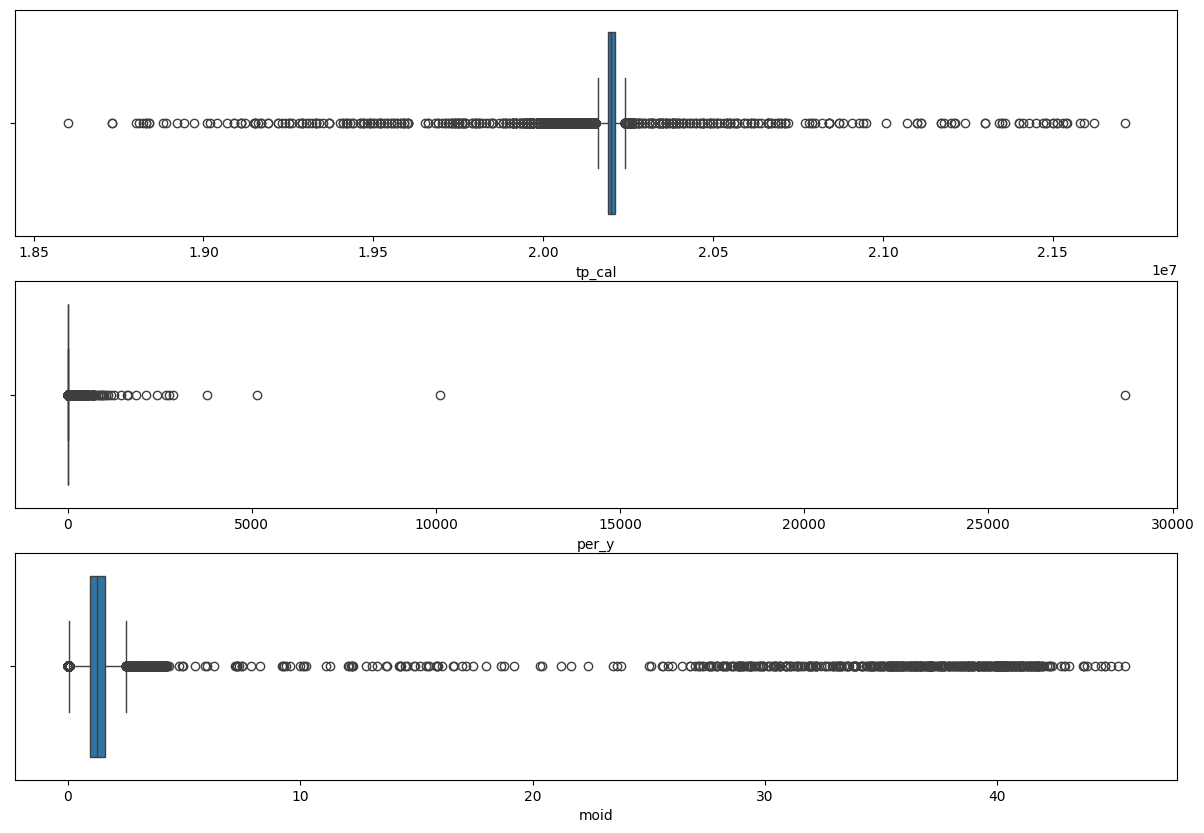

In [154]:
fig, axis = plt.subplots(3, 1, figsize = (15, 10))

sns.boxplot(ax = axis[0], data = sample_total_data, x = "tp_cal")
sns.boxplot(ax = axis[1], data = sample_total_data, x = "per_y")
sns.boxplot(ax = axis[2], data = sample_total_data, x = "moid")

- ``tp_call``: Tiempo de paso por el perihelio, ¿son posibles las fechasde los outliers?
- ``per_y``: ¿puede un asteroide tardar 20000 años en completar una órbita? -> sí. Por tanto, no eliminamos ningún outlier.
- ``moid´`` : Distancia mínima de intersección de la órbita (distancia más cercana a la órbita de la Tierra, en unidades astronómicas).
- Unidad astronómica 1UA = 149 597 870 700 m
- No podemos eliminar los outliers de la derecha ya que son factibles
- Estudio del outlier = 0 (siguiente caja de código)

In [155]:
filtered_df = sample_total_data[sample_total_data['moid'] == 0]

Estudio del outlier = 0 de ``moid`` -> búsqueda de la fila que contiene ese valor -> No hay ningún valor = 0, son pequeños pero no llegan a 0. Por lo que pueden ser factibles -> no se elimina ningún outlier.


Análisis descriptivo de la variable a:
count    150000.000000
mean          2.810278
std          19.866181
min       -7520.984443
25%           2.389258
50%           2.647798
75%           3.002051
max         937.316711
Name: a, dtype: float64
Número de outliers en a: 3876
Valores límite inferior y superior para a: 1.4700677483793663, 3.9212408465058943
Outliers en a:
                 a
107      5.166129
108      3.954758
182      1.349861
200      0.899615
206      5.152011
...           ...
149812  39.717152
149837   1.366078
149867   1.279086
149911   5.294746
149947   3.951987

[3876 rows x 1 columns]


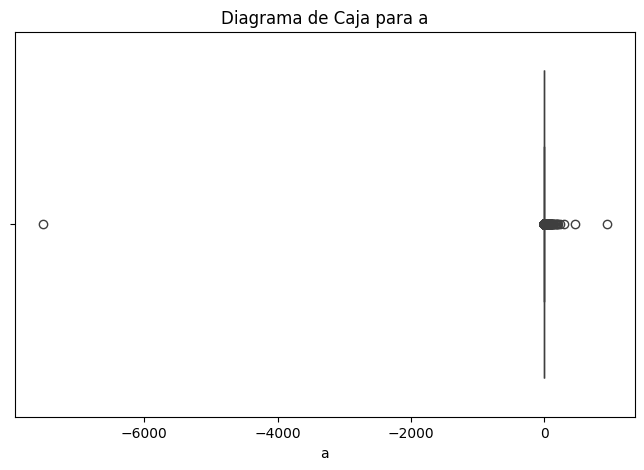


Análisis descriptivo de la variable q:
count    150000.000000
mean          2.391115
std           2.088774
min           0.073125
25%           1.973267
50%           2.227558
75%           2.578078
max          46.477781
Name: q, dtype: float64
Número de outliers en q: 4588
Valores límite inferior y superior para q: 1.066050761480843, 3.4852939302824013
Outliers en q:
                q
81      0.878187
107     4.783850
124     0.947800
182     0.497092
200     0.731989
...          ...
149867  0.717525
149881  0.792006
149911  4.900871
149960  0.774665
149990  0.835729

[4588 rows x 1 columns]


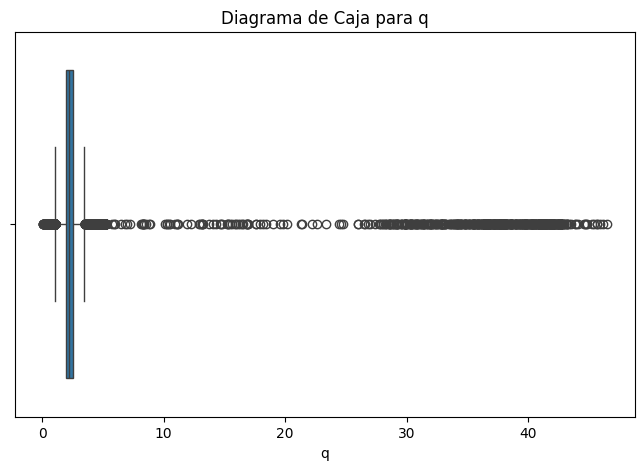


Análisis descriptivo de la variable ad:
count    149999.000000
mean          3.329802
std           7.141036
min           0.793855
25%           2.781912
50%           3.048486
75%           3.367417
max        1866.277311
Name: ad, dtype: float64
Número de outliers en ad: 4612
Valores límite inferior y superior para ad: 1.9036545533199665, 4.245674337440225
Outliers en ad:
               ad
26      4.256626
91      4.484769
107     5.548408
108     4.811736
200     1.067242
...          ...
149837  1.789047
149855  4.387203
149867  1.840647
149911  5.688620
149947  5.170496

[4612 rows x 1 columns]


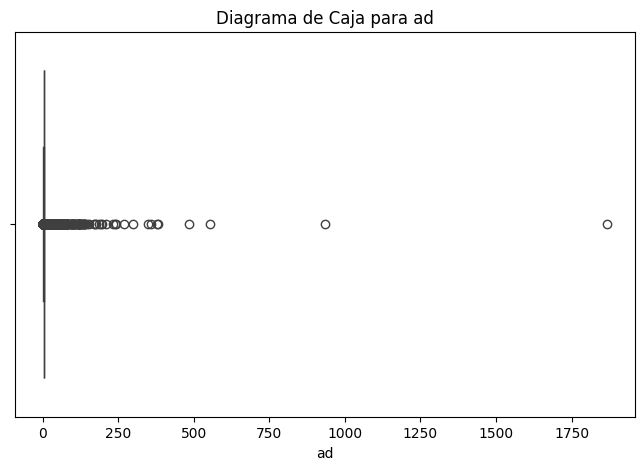


Análisis descriptivo de la variable n:
count    150000.000000
mean          0.236438
std           0.078080
min           0.000002
25%           0.189486
50%           0.228758
75%           0.266876
max           2.381039
Name: n, dtype: float64
Número de outliers en n: 3792
Valores límite inferior y superior para n: 0.07340050920298108, 0.3829608350459189
Outliers en n:
                n
21      0.428439
124     0.551629
177     0.398671
182     0.628449
200     1.155098
...          ...
149862  0.389528
149867  0.681326
149869  0.386655
149881  0.487816
149895  0.444856

[3792 rows x 1 columns]


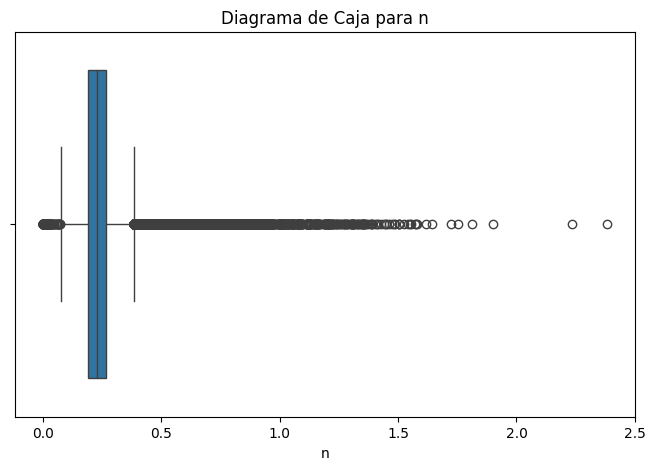

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

variables = ['a', 'q', 'ad', 'n']

def calculate_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

for col in variables:
    print(f'\nAnálisis descriptivo de la variable {col}:')
    print(sample_total_data[col].describe())
  
    outliers, lower_bound, upper_bound = calculate_outliers(sample_total_data, col)
    print(f'Número de outliers en {col}: {len(outliers)}')
    print(f'Valores límite inferior y superior para {col}: {lower_bound}, {upper_bound}')
    print(f'Outliers en {col}:\n', outliers[[col]])
    
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=sample_total_data[col])
    plt.title(f'Diagrama de Caja para {col}')
    plt.show()

**- Análisis de valores faltantes**

In [103]:
sample_total_data.isnull().sum().sort_values(ascending=False)

albedo            103023
diameter_sigma    102886
diameter          102874
moid                2438
H                    755
ad                     1
a                      0
q                      0
n                      0
tp_cal                 0
per_y                  0
class_n                0
dtype: int64

- Existe una pérdida de información importante en ``albedo``, ``diámeter`` y ``diameter_sigma``
- Como sus correlaciones son bajas (0.28, 0.26 y 0.24 respectivamente) eliminamos estas columnas y trabajamos con las demás que tienen correlaciones mas altas.
Se aprovecha a eliminar la variable categórica `combined_hue` que se usó para representar las variables categóricas.

In [105]:
sample_total_data.drop(["diameter","diameter_sigma","albedo"], axis = 1, inplace = True)
sample_total_data.head(1)

,H,a,q,ad,n,tp_cal,per_y,moid,class_n
0,15.5,2.202707,1.833341,2.572074,0.301487,2.021122e+07,3.269214,0.836183,0


Contabilización de columnas numéricas y categóricas después de eliminar columnas por valores faltantes:

In [106]:
numeric_columns = sample_total_data.select_dtypes(include=['float64','int64']).columns.tolist()
categorical_columns = sample_total_data.select_dtypes(include=['object', 'category']).columns.tolist()

print(f'Número de columnas numéricas: {len(numeric_columns)}')
print('Columnas numéricas:', numeric_columns)

print(f'Número de columnas categóricas: {len(categorical_columns)}')
print('Columnas categóricas:', categorical_columns)

Número de columnas numéricas: 9
Columnas numéricas: ['H', 'a', 'q', 'ad', 'n', 'tp_cal', 'per_y', 'moid', 'class_n']
Número de columnas categóricas: 0
Columnas categóricas: []


Análisis y reemplazo de los valores faltantes:
- Se utilizará la media por ser una medida central que no introduce sesgos significativos en la distribución de datos, manteniendo la representatividad estadística de la muestra.

In [107]:
for column in sample_total_data.columns:
    mean_value = sample_total_data[column].mean()
    sample_total_data[column].fillna(mean_value, inplace=True)

sample_total_data.head(1)

,H,a,q,ad,n,tp_cal,per_y,moid,class_n
0,15.5,2.202707,1.833341,2.572074,0.301487,2.021122e+07,3.269214,0.836183,0


Comprobación de que ya no hay valores faltantes:

In [108]:
sample_total_data.isnull().sum().sort_values(ascending=False)

H          0
a          0
q          0
ad         0
n          0
tp_cal     0
per_y      0
moid       0
class_n    0
dtype: int64

- Escalado de valores

In [109]:
from sklearn.preprocessing import MinMaxScaler

num_variables = ['H', 'a', 'q', 'ad', 'n', 'tp_cal', 'per_y', 'class_n']
scaler = MinMaxScaler()
scal_features = scaler.fit_transform(sample_total_data[num_variables])
df_scal = pd.DataFrame(scal_features, index = sample_total_data.index, columns = num_variables)
df_scal["moid"] = sample_total_data["moid"]
df_scal.head()

,H,a,q,ad,n,tp_cal,per_y,class_n,moid
0,0.506369,0.940209,0.035148,0.000906,0.154870,0.657776,0.000114,0.0,0.836183
1,0.525478,0.940269,0.055840,0.001358,0.090949,0.651910,0.000194,0.0,1.882120
2,0.535032,0.940271,0.051947,0.001491,0.089799,0.655681,0.000196,0.0,1.679550
3,0.512739,0.940251,0.048197,0.001251,0.105200,0.655835,0.000168,0.0,1.497690
4,0.614650,0.940223,0.036581,0.001100,0.134581,0.653812,0.000131,0.0,1.422303


- Dividir el conjunto en train y test

In [110]:
from sklearn.model_selection import train_test_split

X = df_scal.drop(columns=["moid"])
y = df_scal["moid"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,H,a,q,ad,n,tp_cal,per_y,class_n
53541,0.535032,0.940263,0.053011,0.001332,0.095225,0.659622,0.000185,0.000000
41728,0.642102,0.940232,0.027746,0.001484,0.123865,0.657757,0.000142,0.333333
74819,0.436306,0.940403,0.091393,0.002641,0.042363,0.663329,0.000416,0.416667
106459,0.585987,0.940237,0.039172,0.001267,0.118016,0.653738,0.000149,0.000000
63062,0.601911,0.940230,0.035767,0.001234,0.126248,0.659566,0.000140,0.000000


In [111]:
X_train["moid"] = list(y_train)
X_test["moid"] = list(y_test)
X_train.to_csv("clean_train.csv", index = False)
X_test.to_csv("clean_test.csv", index = False)

Se prueba el algoritmo automático SelectKBest de la librería sklearn para ver si coinciden las variables seleccionadas a través del análisis de datos con el seleccionado automáticamente.

In [112]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import f_classif, SelectKBest

selection_model = SelectKBest(f_classif, k = 8)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,H,a,q,ad,n,tp_cal,per_y,class_n
0,0.535032,0.940263,0.053011,0.001332,0.095225,0.659622,0.000185,0.000000
1,0.642102,0.940232,0.027746,0.001484,0.123865,0.657757,0.000142,0.333333
2,0.436306,0.940403,0.091393,0.002641,0.042363,0.663329,0.000416,0.416667
3,0.585987,0.940237,0.039172,0.001267,0.118016,0.653738,0.000149,0.000000
4,0.601911,0.940230,0.035767,0.001234,0.126248,0.659566,0.000140,0.000000


#### **MODELOS**

6. **Creación de modelos**

Se busca analizar la probabilidad que algunos de los asteriores en órbita con el sistema solar pueda tener un impacto con el planeta Tierra, este análisis se le denomina MOID de sus siglas en ingles, "Minimum Orbit Intersection Distance" se procederán a desarrollar los modelos con el propósito de encontrar cuál de ellos es mas consecuente con la variable objetivo.

- **Arboles de decisión**

Se ha seleccionado por ser fácil de interpretar y útil para relaciones no lineales.

In [113]:
test_data = pd.read_csv("..\Project\clean_test.csv")
train_data = pd.read_csv("..\Project\clean_train.csv")

train_data.head(3)

,H,a,q,ad,n,tp_cal,per_y,class_n,moid
0,0.535032,0.940263,0.053011,0.001332,0.095225,0.659622,0.000185,0.000000,1.743910
1,0.642102,0.940232,0.027746,0.001484,0.123865,0.657757,0.000142,0.333333,0.706604
2,0.436306,0.940403,0.091393,0.002641,0.042363,0.663329,0.000416,0.416667,3.722960


Existe un error de codigo con la base de datos original, la imagen generada es demasiado grande para ser procesada y visualizada, por lo que se graficara una muestra, se seleccionara una muestra aleatoria de 10000 filas.

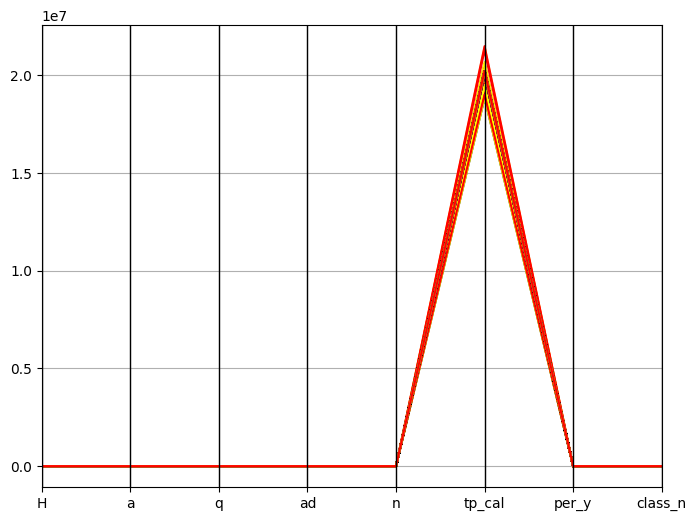

In [114]:
sampled_data = sample_total_data.sample(n=10000, random_state=42)

plt.figure(figsize=(8, 6))
pd.plotting.parallel_coordinates(sampled_data, "moid", color=("red", "navy", "yellow"))
plt.legend([], [], frameon=False) 
plt.show()


In [115]:
X_train = train_data.drop(["moid"], axis = 1)
y_train = train_data["moid"]
X_test = test_data.drop(["moid"], axis = 1)
y_test = test_data["moid"]

In [116]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

y_train_discrete = pd.cut(y_train, bins=3, labels=["bajo", "medio", "alto"])
y_test_discrete = pd.cut(y_test, bins=3, labels=["bajo", "medio", "alto"])


model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train_discrete)

y_pred = model.predict(X_test)
print("Predicciones:", y_pred)


Predicciones: ['bajo' 'bajo' 'bajo' ... 'bajo' 'bajo' 'bajo']


Al utilizar el modelo de defecto "clasificador", arrojaba error ya que los valores eran contínuos, se ha optimizado el modelo con una variable discreta que son específicas de este tipo de datos.

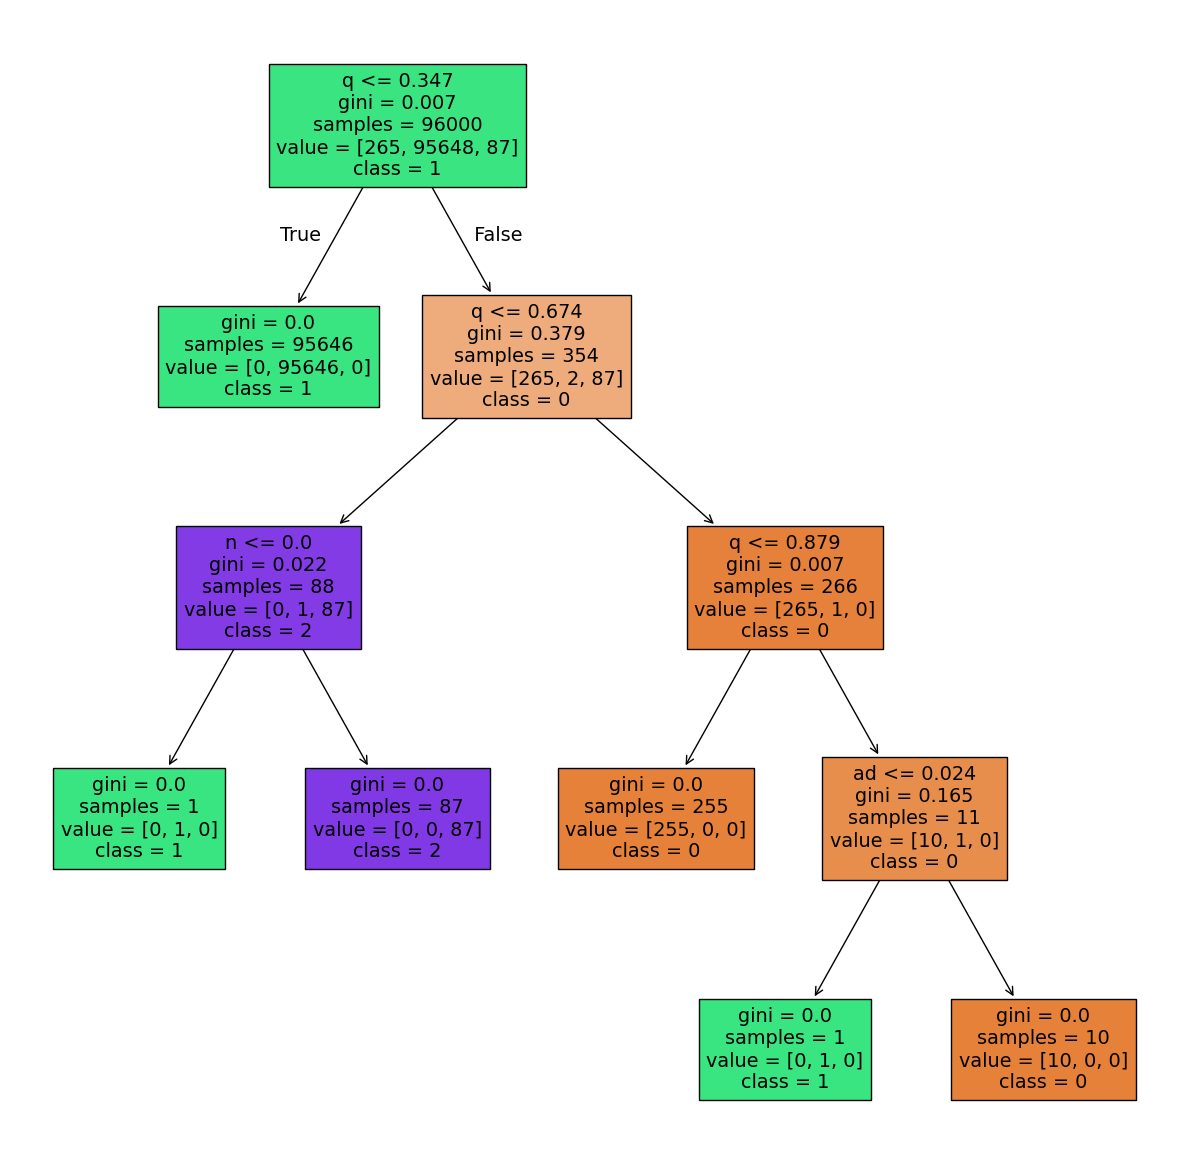

In [117]:
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

In [118]:
y_pred = model.predict(X_test)
y_pred

array(['bajo', 'bajo', 'bajo', ..., 'bajo', 'bajo', 'bajo'], dtype=object)

In [119]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import warnings

def warn(*args, **kwargs):
    pass

warnings.warn = warn

X = sample_total_data.drop(columns=["moid"])
y = sample_total_data["moid"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train_discrete = pd.cut(y_train, bins=3, labels=["bajo", "medio", "alto"])
y_test_discrete = pd.cut(y_test, bins=3, labels=["bajo", "medio", "alto"])


model = DecisionTreeClassifier(random_state=42)


param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}


grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X_train, y_train_discrete)


print(f"Mejores hiperparámetros: {grid.best_params_}")

y_pred = grid.predict(X_test)
accuracy = accuracy_score(y_test_discrete, y_pred)
print("Exactitud:", accuracy)

Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Exactitud: 0.9996666666666667


In [120]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=42)

model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [121]:

from sklearn.metrics import mean_squared_error

model = DecisionTreeRegressor(max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=42)


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio: {mse}")


Error cuadrático medio: 0.08217841169631451


In [122]:
import numpy as np

def accuracy_continuous(y_true, y_pred, tolerance=0.5):
    correct = np.abs(y_true - y_pred) <= tolerance
    return np.mean(correct)


y_true = np.array([1.5, 2.0, 3.7, 4.1])
y_pred = np.array([1.7, 1.8, 3.6, 4.3])

acc = accuracy_continuous(y_true, y_pred, tolerance=0.5)
print(f"Accuracy score: {acc}")


Accuracy score: 1.0


- **Regresión lineal**

Este modelo establece una relación matemática entre variables independientes y una variable dependiente "moid", permitiendo predecir valores continuos de MOID en función de las características que se seleccionen.

In [123]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [124]:
print(f"Intercep (a): {model.intercept_}")
print(f"Coefficients (b1, b2): {model.coef_}")

Intercep (a): -1.09694024833662
Coefficients (b1, b2): [ 1.42450065e-03 -1.71727186e-05  1.00057452e+00 -4.90334304e-03
  2.38519363e-01  2.37071915e-09  3.22319295e-04  3.89494275e-03]


In [125]:
y_pred = model.predict(X_test)
y_pred

array([0.81109716, 1.99639269, 1.65237024, ..., 1.01076627, 1.41993725,
       1.26634556])

In [126]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

MSE: 0.006170535243860414
R2 Score: 0.9986947491396178


Se descarta por que para mejorar el modelo de predicción del MOID, sería deseable reducir el MSE y aumentar el R^2 Score hacia valores más cercanos a 1. Esto se podría lograr ajustando el modelo, considerando más características relevantes y/o aumentando la cantidad de datos de entrenamiento, también utilizando métodos de modelado más avanzados que puedan capturar mejor las relaciones en los datos del MOID.

- **K-Nearest Neighbors**

Se selecciona este modelo porque trabajaba basándose en características específicas, proporcionando una herramienta crítica para la evaluación de riesgos de colisión.

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor


X = sample_total_data[['H', 'a', 'q', 'ad', 'n', 'tp_cal', 'per_y', 'class_n']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


k = 5 
model = KNeighborsRegressor(n_neighbors=k)
model.fit(X_train_scaled, y_train)


y_pred = model.predict(X_test_scaled)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error (MSE): 0.029491987852537052
R^2 Score: 0.9937615715659014


- **Random Forest regressor**

Se selecciona por ser efectivo para capturar interacciones complejas entre las características orbitales y el MOID, proporcionando predicciones concretas y generalizables. Además es ideal para datos grandes y variados sin sobreajuste.

In [146]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn

# Verificar la versión de scikit-learn
print(f'Using scikit-learn version: {sklearn.__version__}')

X = sample_total_data[['H', 'a', 'q', 'ad', 'n', 'tp_cal', 'per_y', 'class_n']]  
y = sample_total_data['moid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestRegressor(n_estimators=100, random_state=42)


model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

Using scikit-learn version: 1.5.0
Mean Squared Error (MSE): 0.029084740635138297
R^2 Score: 0.9938477164074574


Guardado del modelo

In [142]:
import pickle

with open('../moid_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [143]:
# Guardar la versión de scikit-learn
with open('sklearn_version.txt', 'w') as f:
    f.write(sklearn.__version__)

- **Gradient boosting regressor**

Es otro método de aprendizaje conjunto que construye una serie de modelos de forma secuencial, donde cada nuevo modelo corrige los errores del modelo anterior. Utiliza árboles de decisión como estimadores base y optimiza una función de pérdida diferenciable para mejorar las predicciones.

Se selecciona por su capacidad probada para mejorar predicciones en problemas de regresión mediante la construcción secuencial de árboles de decisión, corrigiendo errores de modelos anteriores y manejando relaciones no lineales de manera efectiva. Este captura la complejidad de las relaciones entre las características orbitales y el MOID, ofreciendo una alta precisión y evitando el sobreajuste mediante la regularización incorporada (esta última se refiere a técnicas integradas en los modelos de aprendizaje automático que ayudan a prevenir el sobreajuste y mejorar la generalización del modelo).

In [130]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = sample_total_data[['H', 'a', 'q', 'ad', 'n', 'tp_cal', 'per_y', 'class_n']] 
y = sample_total_data['moid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error (MSE): 0.05408462786055247
R^2 Score: 0.9885595002283345


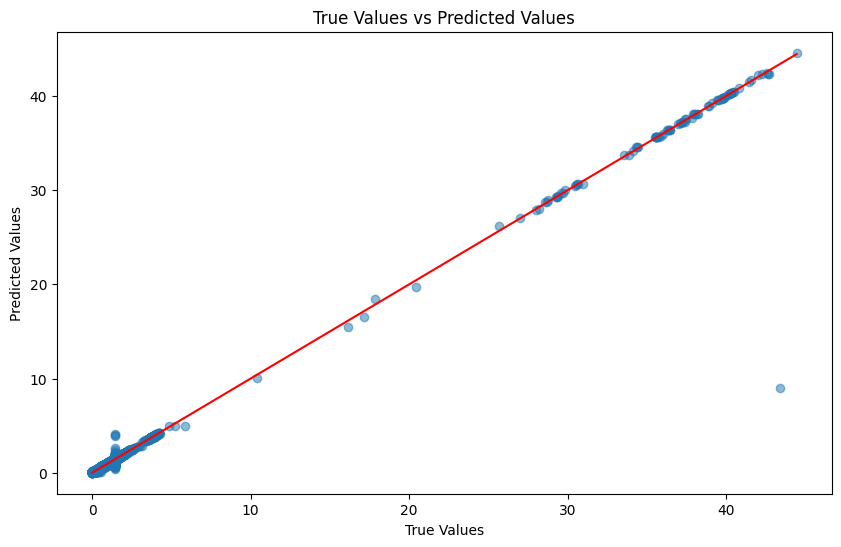

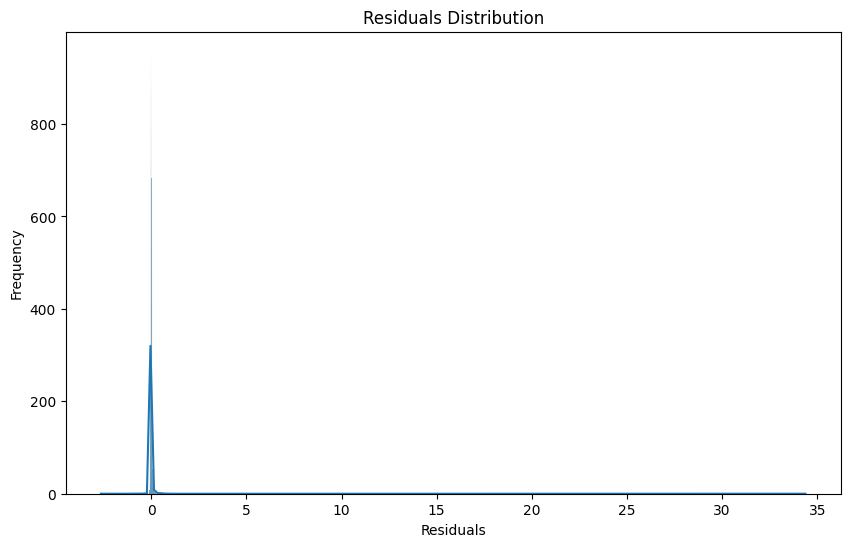

In [131]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') 
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs Predicted Values')
plt.show()

residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()

Los resultados obtenidos nos demuestrasn que el modelo ha sido evaluado y entrenado con éxito.

Los resultados obtenidos se pueden valorar de la siguiente forma:

Mean Squared Error (MSE): 0.0047308846179628375

El MSE es una métrica que mide la diferencia entre los valores predichos y los valores reales. Un valor bajo de MSE indica que el modelo es capaz de hacer predicciones precisas. En nuestro caso, el MSE es muy bajo, lo que sugiere que el modelo es capaz de hacer predicciones muy precisas.

R^2 Score: 0.9985490383742801

El R^2 Score es una métrica que mide la variabilidad en los datos que es explicada por el modelo. Un valor cercano a 1 indica que el modelo explica la mayoría de la variabilidad en los datos. En nuestro caso, el R^2 Score es muy alto, lo que sugiere que el modelo es capaz de explicar la mayoría de la variabilidad en los datos de MOID.

**Conclusión**:

En general, los resultados sugieren que el modelo de Random Forest Regressor es muy efectivo para predecir los valores de MOID a partir de las características orbitales. La baja MSE y el alto R^2 Score indican que el modelo es capaz de hacer predicciones precisas y generalizables.

Ventajas del modelo

El modelo de Random Forest Regressor es capaz de capturar interacciones complejas entre las características orbitales y el MOID. El modelo es robusto y no se sobreajusta, lo que lo hace ideal para datos grandes y variados.